## CTB MARCH

In [1]:
import pandas as pd
import openpyxl
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import rcParams
import re
import calendar
import os
from natsort import natsorted

import warnings
warnings.filterwarnings('ignore')

In [2]:
Startdate = "2020-01-01"
Enddate = "2021-04-01"
#Enddate = "2020-12-31

In [3]:
#getting granular level insights from date
def add_datepart(df, fldname, drop=True):
    
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
    attr = ['Year', 'Month', 'Week', 'Day','hour', 'Dayofweek', 'Dayofyear','weekofyear']
    
    for n in attr: 
        df[targ_pre + n] = getattr(fld.dt, n.lower())
    
    df[targ_pre + "MonthName"] = df[targ_pre + "Month"].astype(int).apply(lambda x: calendar.month_abbr[x])
    df[targ_pre + "MonthKey"] =  df[targ_pre + "Year"].astype(str)+"_"+df[targ_pre + "Month"].astype(str)
    df[targ_pre + "WeekKey"] =  df[targ_pre + "Year"].astype(str)+"_"+df[targ_pre + "Week"].astype(str)
        
    if drop: 
        df.drop(fldname, axis=1, inplace=True)

In [4]:
def select_date_range(dataset, datevariable, startdate, enddate):
    print("old shape:", dataset.shape)
    dataset = dataset[(dataset[datevariable]>Startdate) & (dataset[datevariable]<Enddate)]
    print("new shape:", dataset.shape)
    return dataset

In [5]:
def Trend_Analysis_gb(dataset, Variables, DateVariable, GroupbyVariable, TrendType):

    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).count()
       
    if TrendType =="Monthly":
        #Trend['Month_name']= Trend[DateVariable].astype(int).apply(lambda x: calendar.month_abbr[x])
        pass
        
    if TrendType =="Weekly":    
        pass
    
    if TrendType =="Hourly":
        Hourly_Labels = ['22-24','0-2','0-2','2-4','2-4','4-6','4-6','6-8','6-8','8-10','8-10','10-12','10-12','12-14','12-14','14-16','14-16','16-18','16-18','18-20','18-20','20-22','20-22','22-24']
        interval_range = pd.interval_range(start=0, freq=2, end=24)
        Trend['Range'] = pd.cut(Trend[DateVariable], bins=interval_range)
        Trend['Range_name']= pd.DataFrame(Hourly_Labels)
        Trend_Hr_range = Trend[['ORDER_ID','Range_name']].groupby('Range_name',as_index=False).sum()
        Trend = Trend_Hr_range.copy()
        
        
    return Trend   

In [6]:
def Trend_Analysis_pi(dataset, Variables, CountVariable,DateVariable, GroupbyVariable, TrendType):
    
    Trend = dataset[Variables].pivot_table(index=GroupbyVariable, columns=CountVariable, aggfunc=len, fill_value=0)
    Trend.reset_index(inplace=True)
        
    if TrendType =="Monthly":
        #Trend['Month_name']= Trend[DateVariable].astype(int).apply(lambda x: calendar.month_abbr[x])
        pass
        
    if TrendType =="Weekly":    
        pass
    
    if TrendType =="Hourly":
        Hourly_Labels = ['22-24','0-2','0-2','2-4','2-4','4-6','4-6','6-8','6-8','8-10','8-10','10-12','10-12','12-14','12-14','14-16','14-16','16-18','16-18','18-20','18-20','20-22','20-22','22-24']
        interval_range = pd.interval_range(start=0, freq=2, end=24)
        Trend['Range'] = pd.cut(Trend[DateVariable], bins=interval_range)
        Trend['Range_name']= pd.DataFrame(Hourly_Labels)
        Trend_Hr_range = Trend[['ORDER_ID','Range_name']].groupby('Range_name',as_index=False).sum()
        Trend = Trend_Hr_range.copy()
        
        
    return Trend
    

In [7]:
def Merge(left, left_on_var, right1, right1_on_var, right2, right2_on_var, how, ind, occurrence):
    merged1 = pd.merge(left, right1, left_on=left_on_var, right_on = right1_on_var, how = how,indicator=ind)
    if occurrence == 'double':
        merged1.drop(['_merge'], axis=1,inplace = True)
        merged2 = pd.merge(merged1, right2, left_on=left_on_var ,right_on = right2_on_var,how = how,indicator=ind)
        return merged2
    return merged1

In [8]:
CTB_data_raw1 = pd.read_excel("ctb_ord140421.xls",sheet_name='Sheet 1')
print(CTB_data_raw1.shape)
CTB_data_raw1.head(2)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(64999, 33)


,_REGION _CODE,DELR_RGON_NAME,_DEALER _ID,_DEALER _NAME,_ASSIGNED _SALES _CONSULTANT,_STATE,_CITY,_ORDER _ID,_ORDER _DATE,_ORDER _STATUS,...,_BOOKING (_Y/_N),_FINAL _PURCHASE _AMOUNT,_BOOKING _AMOUNT,_BALANCE _AMOUNT,_TRADE-IN (_Y/_N),_DEALER _CODE (_Y/_N),_DEAL _CODE _VALUE,BOOKING_DATE,INVC_CNFR_YN,PAY_AT_DELR_YN
0,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012816276904,28-JAN-2020 19:50:08,Cancellation,...,N,0,0,0,N,N,0,NaT,N,N
1,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD20202642245061,06-FEB-2020 15:19:11,Cancellation,...,N,0,0,0,N,N,0,NaT,N,N


In [9]:
CTB_data_raw2 = pd.read_excel("ctb_ord140421.xls",sheet_name='Sheet 2')
print(CTB_data_raw2.shape)
CTB_data_raw2.head(2)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(10637, 33)


,_REGION _CODE,DELR_RGON_NAME,_DEALER _ID,_DEALER _NAME,_ASSIGNED _SALES _CONSULTANT,_STATE,_CITY,_ORDER _ID,_ORDER _DATE,_ORDER _STATUS,...,_BOOKING (_Y/_N),_FINAL _PURCHASE _AMOUNT,_BOOKING _AMOUNT,_BALANCE _AMOUNT,_TRADE-IN (_Y/_N),_DEALER _CODE (_Y/_N),_DEAL _CODE _VALUE,BOOKING_DATE,INVC_CNFR_YN,PAY_AT_DELR_YN
0,C1101,Central RO1,N1220,FRONTIER HYUNDAI,RANJAN OJHA,Delhi,Delhi,ORD2021013115641234,31-JAN-2021 20:52:11,Open,...,N,1039698,0,1039698,N,N,0,NaT,N,N
1,S1104,South RO4,S8230,LAKSHMI HYUNDAI,VANUSHA,Karnataka,Bangalore,ORD2021013118773154,31-JAN-2021 21:30:56,Open,...,N,1048982,0,1048982,N,N,0,NaT,N,N


In [10]:
frames = [CTB_data_raw1,CTB_data_raw2]
CTB_data_raw = pd.concat(frames)
print(CTB_data_raw.shape)
CTB_data_raw.columns

(75636, 33)


Index(['_REGION _CODE', 'DELR_RGON_NAME', '_DEALER _ID', '_DEALER _NAME',
       '_ASSIGNED _SALES _CONSULTANT', '_STATE', '_CITY', '_ORDER _ID',
       '_ORDER _DATE', '_ORDER _STATUS', '_ORDER _STAGE',
       '_CONSULTANT _ASSISGN (_Y/_N)', '_CUSTOMER _NAME', '_CUSTOMER _MOBILE',
       '_CUSTOMER _EMAIL', '_MODEL', '_ENGINE', '_VARIANT', '_INTERIOR _COLOR',
       '_EXTERIOR _COLOR', '_FINANCE (_Y/_N)', '_LOAN _TYPE',
       '_FINANCE _STATUS', '_BOOKING (_Y/_N)', '_FINAL _PURCHASE _AMOUNT',
       '_BOOKING _AMOUNT', '_BALANCE _AMOUNT', '_TRADE-IN (_Y/_N)',
       '_DEALER _CODE (_Y/_N)', '_DEAL _CODE _VALUE', 'BOOKING_DATE',
       'INVC_CNFR_YN', 'PAY_AT_DELR_YN'],
      dtype='object')

In [11]:
CTB_New_columns = ['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN']
#33columns

In [12]:
CTB_data_raw.columns=CTB_New_columns

In [13]:
CTB_data_raw.shape

(75636, 33)

In [14]:
CTB_data_raw1 = CTB_data_raw.loc[(CTB_data_raw['ORDER_DATE'] >= '2020-01-01')
                     & (CTB_data_raw['ORDER_DATE'] < '2021-04-01')]

In [15]:
add_datepart(CTB_data_raw,'ORDER_DATE',False)

In [16]:
print(CTB_data_raw.shape)
print(CTB_data_raw.columns)
CTB_data_raw.head()

(75636, 44)
Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey'],
      dtype='object')


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,ORDER_DATEMonth,ORDER_DATEWeek,ORDER_DATEDay,ORDER_DATEhour,ORDER_DATEDayofweek,ORDER_DATEDayofyear,ORDER_DATEweekofyear,ORDER_DATEMonthName,ORDER_DATEMonthKey,ORDER_DATEWeekKey
0,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012816276904,2020-01-28 19:50:08,Cancellation,...,1,5,28,19,1,28,5,Jan,2020_1,2020_5
1,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD20202642245061,2020-02-06 15:19:11,Cancellation,...,2,6,6,15,3,37,6,Feb,2020_2,2020_6
2,C1101,Central RO1,N1220,FRONTIER HYUNDAI,Mandeep Singh,Delhi,Delhi,ORD202011413365197,2020-01-14 11:04:27,Cancellation,...,1,3,14,11,1,14,3,Jan,2020_1,2020_3
3,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,Neeraj Singhal,Delhi,Delhi,ORD202011511731225,2020-01-15 05:48:59,Cancellation,...,1,3,15,5,2,15,3,Jan,2020_1,2020_3
4,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,Neeraj Singhal,Delhi,Delhi,ORD202011550357047,2020-01-15 05:54:55,Cancellation,...,1,3,15,5,2,15,3,Jan,2020_1,2020_3


In [17]:
CTB_not4 = CTB_data_raw.loc[(CTB_data_raw['ORDER_DATEMonth'] !=4)].sort_values('ORDER_DATEMonth')
CTB_not4.shape

(61741, 44)

In [18]:
CTB_4 = CTB_data_raw.loc[(CTB_data_raw['ORDER_DATEMonth'] ==4)].sort_values('ORDER_DATEMonth')
CTB_4.shape

(13895, 44)

In [19]:
## removing sales consultant values

In [20]:
apr_remove = pd.read_excel("AprilAnalysis.xlsx", sheet_name=' 4 SC orders frm 1')
apr_remove.shape

(7782, 17)

In [21]:
apr_merged = pd.merge(CTB_4, apr_remove['_ORDER _ID'], left_on='ORDER_ID', right_on = '_ORDER _ID', how = 'outer',indicator=True)
apr_merged.shape

(13895, 46)

In [22]:
apr_merged['_merge'].value_counts()

both          7782
left_only     6113
right_only       0
Name: _merge, dtype: int64

In [23]:
apr_custonly = apr_merged.loc[(apr_merged['_merge'] == 'left_only')]
print(apr_custonly.shape)
#apr_custonly.head(2)

(6113, 46)


In [24]:
CTB_april = apr_custonly.copy()
CTB_april.drop(['_merge'], axis=1,inplace = True)
print (CTB_april.shape)

(6113, 45)


In [25]:
frames = [CTB_not4,CTB_april]
CTB_sc_treat = pd.concat(frames)
print(CTB_sc_treat.shape)
CTB_sc_treat.columns

(67854, 45)


Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID'],
      dtype='object')

In [26]:
CTB_data = select_date_range(CTB_sc_treat,"ORDER_DATE",Startdate,Enddate)

old shape: (67854, 45)
new shape: (65792, 45)


In [27]:
CTB_data.to_csv("ctbmar_sc_remove.csv")

In [28]:
CTB_data.drop(['_ORDER _ID'], axis=1,inplace = True)

In [29]:
CTB_data.head()

,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,ORDER_DATEMonth,ORDER_DATEWeek,ORDER_DATEDay,ORDER_DATEhour,ORDER_DATEDayofweek,ORDER_DATEDayofyear,ORDER_DATEweekofyear,ORDER_DATEMonthName,ORDER_DATEMonthKey,ORDER_DATEWeekKey
0,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012816276904,2020-01-28 19:50:08,Cancellation,...,1,5,28,19,1,28,5,Jan,2020_1,2020_5
64078,N1102,North RO2,N4240,ARORA HYUNDAI,Xyz,Rajasthan,Jaipur,ORD2021012615942517,2021-01-26 18:17:32,Open,...,1,4,26,18,1,26,4,Jan,2021_1,2021_4
64077,N1102,North RO2,W4201,P.L. HYUNDAI,ASHOK KUMAR,Rajasthan,Jaipur,ORD2021012613923413,2021-01-26 18:27:20,Cancellation,...,1,4,26,18,1,26,4,Jan,2021_1,2021_4
64076,S1101,South RO1,S4229,PEEYESYEM HYUNDAI,JOHN VASANTHAN.A,Tamilnadu,Tuticorin,ORD2021012615591904,2021-01-26 18:04:10,Cancellation,...,1,4,26,18,1,26,4,Jan,2021_1,2021_4
64075,W1101,West RO1,W2201,KETAN HYUNDAI,Ganesh Itankar,Maharashtra,Nagpur,ORD2021012214001999,2021-01-22 14:55:30,Open,...,1,3,22,14,4,22,3,Jan,2021_1,2021_3


In [363]:
CTB_data['ORDER_DATEMonthKey'].max()

'2021_3'

In [30]:
CTB_booking = CTB_data[CTB_data["BOOKING"]=="Y"]
print("CTB_booking : ", CTB_booking.shape)
CTB_booking_na = CTB_booking[CTB_booking["BOOKING_DATE"].notna()]
print("CTB_booking_na : ",CTB_booking_na.shape)

CTB_booking :  (2621, 44)
CTB_booking_na :  (2296, 44)


In [31]:
add_datepart(CTB_booking_na,'BOOKING_DATE',False)

In [32]:
CTB_booking_na.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       'BOOKING_DATEYear', 'BOOKING_DATEMonth', 'BOOKING_DATEWeek',
       'BOOKING_DATEDay', 'BOOKING_DATEhour', 'BOOKING_DATEDayofweek',
       'BOOKING_DATEDayofyear', 'BOOKING_

## READING GDMS DATASET

In [33]:
GDMS_data_raw1 = pd.read_excel("ctb_gdms140421.xls",sheet_name='Sheet 1')
print(GDMS_data_raw1.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(64999, 15)


In [34]:
GDMS_data_raw1.head(2)

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE
0,ROSHAN HYUNDAI,N4A06,E202041462,20201104,80,Invoice Cancel,SV,All New i20,Y,ORD2020110413233196,Y,NaN,NaN,B202001236,20201104.0
1,SAI AUTO HYUNDAI,W1210,E202039463,20201028,80,Invoice Cancel,SV,All New i20,Y,ORD2020102811922815,Y,NaN,NaN,B202016328,20201028.0


In [35]:
GDMS_data_raw2 = pd.read_excel("ctb_gdms140421.xls",sheet_name='Sheet 2')

print(GDMS_data_raw2.shape)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(8112, 15)


In [36]:
GDMS_data_raw2.head(2)

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE
0,KUSALAVA HYUNDAI,S5A08,E202112248,20210316,9,Enquiry Follow up,FH,New Creta,Y,ORD2021031619520788,N,NaN,NaN,NaN,NaN
1,BLUE HYUNDAI,S8A04,E202114416,20210329,91,CTB-Booking Cancellation Request,SP,Venue,Y,ORD2021032913677914,N,NaN,NaN,NaN,NaN


In [37]:
frames = [GDMS_data_raw1,GDMS_data_raw2]
GDMS_data_raw = pd.concat(frames)
print(GDMS_data_raw.shape)
GDMS_data_raw.columns

(73111, 15)


Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE'],
      dtype='object')

In [38]:
GDMS_booking_raw = GDMS_data_raw.copy()
GDMS_booking_raw = GDMS_booking_raw[GDMS_booking_raw["BKNG_DATE"].notna()]
GDMS_booking_raw.shape

(5864, 15)

In [39]:
GDMS_booking_raw['BKNG_DATE_NEW'] = GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[6:8])
GDMS_booking_raw['BKNG_DATE_NEW'].head(2)

0    2020-11-04
1    2020-10-28
Name: BKNG_DATE_NEW, dtype: object

In [40]:
GDMS_booking_raw['BKNG_DATE_NEW']

0       2020-11-04
1       2020-10-28
2       2020-05-15
3       2020-06-01
4       2020-10-06
           ...    
5859    2021-04-08
5860    2021-03-09
5861    2020-03-15
5862    2020-03-11
5863    2020-10-13
Name: BKNG_DATE_NEW, Length: 5864, dtype: object

GDMS_booking_raw = GDMS_booking_raw.loc[(GDMS_booking_raw['BKNG_DATE_NEW'] >= '2020-1-1')
                     & (GDMS_booking_raw['BKNG_DATE_NEW'] < '2021-4-1')]

In [41]:
add_datepart(GDMS_booking_raw,'BKNG_DATE_NEW',False)
print(GDMS_booking_raw.columns)
GDMS_booking = select_date_range(GDMS_booking_raw,"BKNG_DATE_NEW",Startdate,Enddate)

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')
old shape: (5864, 27)
new shape: (5553, 27)


In [42]:
#GDMS_booking.drop(['BKNG_DATE'], axis=1, inplace=True)

## CTB AND GDMS MERGE

In [43]:
CTB_GDMS = pd.merge(CTB_data_raw, GDMS_booking, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print(CTB_GDMS.shape)
CTB_GDMS['_merge'].value_counts()

(75645, 72)


left_only     70006
both           5630
right_only        9
Name: _merge, dtype: int64

In [44]:
#Retail data
CTB_GDMS_Both_book = CTB_GDMS[CTB_GDMS["_merge"]!="left_only"]
print(CTB_GDMS_Both_book.shape)
CTB_GDMS_Both_book.to_excel("CTB_GDMS_booking_till_March.xlsx")

(5639, 72)


In [45]:
GDMS_retail_raw = GDMS_data_raw[(GDMS_data_raw["RETAIL_DATE"].notna()) & (GDMS_data_raw['EQRY_STAT']==45)]
print(GDMS_retail_raw.shape)
GDMS_retail_raw.head(2)

(2393, 15)


,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE
138,HIMGIRI HYUNDAI,N2226,E202000837,20200118,45,Retail,C7,New i20,Y,ORD202011822130451,N,20200131.0,Y,B202018083,20200129.0
151,JOSHI AUTOMOBILES PVT. LTD.,N7204,E202020775,20200627,45,Retail,FH,New Creta,Y,ORD2020062713739086,Y,20200707.0,Y,B202003559,20200627.0


In [46]:
GDMS_retail_raw['RETAIL_DATE_NEW'] = GDMS_retail_raw['RETAIL_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_retail_raw['RETAIL_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_retail_raw['RETAIL_DATE'].map(lambda x: str(x)[6:8])
GDMS_retail_raw['RETAIL_DATE_NEW'].head(2)

138    2020-01-31
151    2020-07-07
Name: RETAIL_DATE_NEW, dtype: object

In [47]:
add_datepart(GDMS_retail_raw,'RETAIL_DATE_NEW',False)
print(GDMS_retail_raw.columns)
GDMS_retail = select_date_range(GDMS_retail_raw,"RETAIL_DATE_NEW",Startdate,Enddate)

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'RETAIL_DATE_NEW',
       'RETAIL_DATE_NEWYear', 'RETAIL_DATE_NEWMonth', 'RETAIL_DATE_NEWWeek',
       'RETAIL_DATE_NEWDay', 'RETAIL_DATE_NEWhour', 'RETAIL_DATE_NEWDayofweek',
       'RETAIL_DATE_NEWDayofyear', 'RETAIL_DATE_NEWweekofyear',
       'RETAIL_DATE_NEWMonthName', 'RETAIL_DATE_NEWMonthKey',
       'RETAIL_DATE_NEWWeekKey'],
      dtype='object')
old shape: (2393, 27)
new shape: (2312, 27)


In [365]:
GDMS_retail['RETAIL_DATE_NEWMonthKey'].max()

'2021_3'

### Monthly/Weekly/Hourly Analysis

In [48]:
#Monthly Enquiry trend
Monthly_trend_Enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','ORDER_DATEMonthKey'],'ORDER_DATEMonthKey','ORDER_DATEMonthKey','Monthly')
Monthly_trend_Enq.columns = ["ORDER_DATEMonthKey","Enquiry Count"]

#Monthly Booking trend
Monthly_trend_Booking = Trend_Analysis_pi(GDMS_booking,['CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey','BKNG_DATE_NEWMonthKey','Monthly')
Monthly_trend_Booking.columns = ['BKNG_DATE_NEWMonthKey', 'CTB_BOOKING_N', 'CTB_BOOKING_Y']

#Monthly Retail trend
Monthly_trend_Retail = Trend_Analysis_gb(GDMS_retail,['EQRY_REF_NO','RETAIL_DATE_NEWMonthKey'],'RETAIL_DATE_NEWMonthKey','RETAIL_DATE_NEWMonthKey','Monthly')
Monthly_trend_Retail.columns = ["RETAIL_DATE_NEWMonthKey","Retail Count"]


In [49]:
Monthly_trend_Enq

,ORDER_DATEMonthKey,Enquiry Count
0,2020_1,191
1,2020_10,8590
2,2020_11,6887
3,2020_12,6603
4,2020_2,350
5,2020_3,688
6,2020_4,4051
7,2020_5,2224
8,2020_6,5888
9,2020_7,4902


In [50]:
5915-4606

1309

In [51]:
4606

4606

In [52]:
Monthly_trend_Booking

,BKNG_DATE_NEWMonthKey,CTB_BOOKING_N,CTB_BOOKING_Y
0,2020_1,1,0
1,2020_10,416,535
2,2020_11,403,361
3,2020_12,383,182
4,2020_2,8,0
5,2020_3,31,8
6,2020_4,9,50
7,2020_5,50,40
8,2020_6,162,67
9,2020_7,244,73


In [53]:
Monthly_trend_Retail

,RETAIL_DATE_NEWMonthKey,Retail Count
0,2020_1,1
1,2020_10,273
2,2020_11,295
3,2020_12,297
4,2020_2,3
5,2020_3,2
6,2020_5,30
7,2020_6,106
8,2020_7,159
9,2020_8,219


In [54]:
#Weekly Enquiry trend
Weekly_trend_Enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','ORDER_DATEWeekKey'],'ORDER_DATEWeekKey','ORDER_DATEWeekKey','Weekly')
Weekly_trend_Enq.columns = ['ORDER_DATEWeekKey','Enquiry Count']

#Weekly Booking trend
Weekly_trend_Booking = Trend_Analysis_pi(GDMS_booking,['CTB_BOOKING_Y','BKNG_DATE_NEWWeekKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWWeekKey','BKNG_DATE_NEWWeekKey','Weekly')
Weekly_trend_Booking.columns = ['BKNG_DATE_NEWWeekKey', 'CTB_BOOKING_N', 'CTB_BOOKING_Y']

#Weekly Retail trend
Weekly_trend_Retail = Trend_Analysis_gb(GDMS_retail,['EQRY_REF_NO','RETAIL_DATE_NEWWeekKey'],'RETAIL_DATE_NEWWeekKey','RETAIL_DATE_NEWWeekKey','Weekly')
Weekly_trend_Retail.columns = ["RETAIL_DATE_NEWWeekKey","Retail Count"]


In [55]:
#Hourly_trend_booking
Hourly_trend_Enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','ORDER_DATEhour'],'ORDER_DATEhour','ORDER_DATEhour','Hourly')
Hourly_trend_Enq.columns = ['Range_name','Enquiry Count']

Hourly_trend_booking = Trend_Analysis_gb(CTB_booking_na,['ORDER_ID','BOOKING_DATEhour'],'BOOKING_DATEhour','BOOKING_DATEhour','Hourly')
Hourly_trend_booking.columns = ["Range_name","Booking Count"]


In [56]:
Weekly_trend_Enq

,ORDER_DATEWeekKey,Enquiry Count
0,2020_10,105
1,2020_11,102
2,2020_12,160
3,2020_13,255
4,2020_14,287
...,...,...
60,2021_53,522
61,2021_6,1418
62,2021_7,1167
63,2021_8,1002


In [57]:
Weekly_trend_Booking

,BKNG_DATE_NEWWeekKey,CTB_BOOKING_N,CTB_BOOKING_Y
0,2020_10,9,0
1,2020_11,10,2
2,2020_12,7,3
3,2020_13,5,3
4,2020_14,0,6
...,...,...,...
58,2021_53,7,21
59,2021_6,76,80
60,2021_7,68,62
61,2021_8,116,56


In [58]:
Weekly_trend_Retail

,RETAIL_DATE_NEWWeekKey,Retail Count
0,2020_12,2
1,2020_19,2
2,2020_20,5
3,2020_21,9
4,2020_22,14
5,2020_23,16
6,2020_24,21
7,2020_25,34
8,2020_26,24
9,2020_27,24


In [59]:
Hourly_trend_Enq

,Range_name,Enquiry Count
0,0-2,2571
1,10-12,7923
2,12-14,8033
3,14-16,8238
4,16-18,7399
5,18-20,7664
6,2-4,952
7,20-22,7786
8,22-24,6321
9,4-6,1038


In [60]:
Hourly_trend_booking

,Range_name,Booking Count
0,0-2,32
1,10-12,323
2,12-14,363
3,14-16,336
4,16-18,347
5,18-20,268
6,2-4,11
7,20-22,223
8,22-24,123
9,4-6,12


In [61]:
Monthly_Trend_merg = Merge(Monthly_trend_Enq,'ORDER_DATEMonthKey',Monthly_trend_Booking,'BKNG_DATE_NEWMonthKey',Monthly_trend_Retail,'RETAIL_DATE_NEWMonthKey','outer',True,'double')
Monthly_Trend_merg[['Year','Month']] = Monthly_Trend_merg.ORDER_DATEMonthKey.str.split("_",expand=True)

Monthly_Trend_merg

,ORDER_DATEMonthKey,Enquiry Count,BKNG_DATE_NEWMonthKey,CTB_BOOKING_N,CTB_BOOKING_Y,RETAIL_DATE_NEWMonthKey,Retail Count,_merge,Year,Month
0,2020_1,191,2020_1,1,0,2020_1,1.0,both,2020,1
1,2020_10,8590,2020_10,416,535,2020_10,273.0,both,2020,10
2,2020_11,6887,2020_11,403,361,2020_11,295.0,both,2020,11
3,2020_12,6603,2020_12,383,182,2020_12,297.0,both,2020,12
4,2020_2,350,2020_2,8,0,2020_2,3.0,both,2020,2
5,2020_3,688,2020_3,31,8,2020_3,2.0,both,2020,3
6,2020_4,4051,2020_4,9,50,NaN,NaN,left_only,2020,4
7,2020_5,2224,2020_5,50,40,2020_5,30.0,both,2020,5
8,2020_6,5888,2020_6,162,67,2020_6,106.0,both,2020,6
9,2020_7,4902,2020_7,244,73,2020_7,159.0,both,2020,7


In [62]:
Monthly_Trend = Monthly_Trend_merg[["ORDER_DATEMonthKey","Year","Month","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Retail Count"]]
Monthly_Trend

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count
0,2020_1,2020,1,191,0,1,1.0
1,2020_10,2020,10,8590,535,416,273.0
2,2020_11,2020,11,6887,361,403,295.0
3,2020_12,2020,12,6603,182,383,297.0
4,2020_2,2020,2,350,0,8,3.0
5,2020_3,2020,3,688,8,31,2.0
6,2020_4,2020,4,4051,50,9,NaN
7,2020_5,2020,5,2224,40,50,30.0
8,2020_6,2020,6,5888,67,162,106.0
9,2020_7,2020,7,4902,73,244,159.0


In [63]:
Monthly_Trend_final_added = Monthly_Trend.copy()
Monthly_Trend_final_added["CRM Booking"] = 0
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_4"), 114,Monthly_Trend_final_added["CRM Booking"])
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"), 156,Monthly_Trend_final_added["CRM Booking"])
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 122,Monthly_Trend_final_added["CRM Booking"])

Monthly_Trend_final_added["CRM Retail"] = 0
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_4"), 1,Monthly_Trend_final_added["CRM Retail"])
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"), 66,Monthly_Trend_final_added["CRM Retail"])
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 112,Monthly_Trend_final_added["CRM Retail"])


Monthly_Trend_final_added["Financial_enquiry"] = 0
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_12"),2712,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_1"), 727,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_2"), 1346,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_3"), 1441,Monthly_Trend_final_added["Financial_enquiry"])


Monthly_Trend_final_added["Visitors"] = 0

Monthly_Trend_final_added["Visitors"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_4"),634892,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"),43962 ,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 739592,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_7"), 1743236,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_8"), 281136,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_9"), 525295,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_10"), 966755,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_11"), 953487,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_12"), 1152471,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_1"), 794194,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_2"), 704709,Monthly_Trend_final_added["Visitors"])
Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_3"), 1101148,Monthly_Trend_final_added["Visitors"])


Monthly_Trend_final_added["CTB Registration"] = 0
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_1"),120,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_2"),276,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_3"),664,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_4"),4487,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_5"),1657,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_6"),5127,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_7"),5004,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_8"),4012,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_9"),5694,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_10"),8000,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_11"),5874,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_12"),6236,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_1"),4057,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_2"),3835,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_3"),4403,Monthly_Trend_final_added["CTB Registration"])






Monthly_Trend_final_added["Online Booking"] = Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CRM Booking"]
Monthly_Trend_final_added["Total CTB Booking"] = Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CTB_BOOKING_N"]
Monthly_Trend_final_added["Total Booking"] = Monthly_Trend_final_added["CTB_BOOKING_N"]+ Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CRM Booking"]
Monthly_Trend_final_added["Total Retail"] = Monthly_Trend_final_added["Retail Count"]+ Monthly_Trend_final_added["CRM Retail"]
Monthly_Trend_final_added["Total Enquiry"] = Monthly_Trend_final_added["Enquiry Count"]+Monthly_Trend_final_added["Financial_enquiry"]
Monthly_Trend_final_added.fillna(0.0,inplace=True)
Monthly_Trend_final_added["Retail Conversion Ratio"] = (Monthly_Trend_final_added["Total Retail"]/Monthly_Trend_final_added["Enquiry Count"])
Monthly_Trend_final_added
#np.where((CTB_Registrations['Month_Name'] == 'Apr') & (CTB_Registrations['year'] == 2020 ) , 4487,CTB_Registrations['Registration_Count'] )

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1.0,0,0,0,0,120,0,1,1,1.0,191,0.005236
1,2020_10,2020,10,8590,535,416,273.0,0,0,0,966755,8000,535,951,951,273.0,8590,0.031781
2,2020_11,2020,11,6887,361,403,295.0,0,0,0,953487,5874,361,764,764,295.0,6887,0.042834
3,2020_12,2020,12,6603,182,383,297.0,0,0,2712,1152471,6236,182,565,565,297.0,9315,0.044980
4,2020_2,2020,2,350,0,8,3.0,0,0,0,0,276,0,8,8,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,2.0,0,0,0,0,664,8,39,39,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,0.0,114,1,0,634892,4487,164,59,173,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,30.0,156,66,0,43962,1657,196,90,246,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,106.0,122,112,0,739592,5127,189,229,351,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,159.0,0,0,0,1743236,5004,73,317,317,159.0,4902,0.032436


In [64]:
from natsort import natsorted
from natsort import natsorted, index_natsorted, order_by_index

#df2=natsorted(df2,df2['ORDER_DATEWeekKey'],)
Monthly_Trend_final_added = Monthly_Trend_final_added.reindex(index=order_by_index(Monthly_Trend_final_added.index, index_natsorted(Monthly_Trend_final_added.ORDER_DATEMonthKey)))

In [65]:
Monthly_Trend_final_added

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1.0,0,0,0,0,120,0,1,1,1.0,191,0.005236
4,2020_2,2020,2,350,0,8,3.0,0,0,0,0,276,0,8,8,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,2.0,0,0,0,0,664,8,39,39,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,0.0,114,1,0,634892,4487,164,59,173,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,30.0,156,66,0,43962,1657,196,90,246,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,106.0,122,112,0,739592,5127,189,229,351,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,159.0,0,0,0,1743236,5004,73,317,317,159.0,4902,0.032436
10,2020_8,2020,8,4859,101,275,219.0,0,0,0,281136,4012,101,376,376,219.0,4859,0.045071
11,2020_9,2020,9,6012,108,357,212.0,0,0,0,525295,5694,108,465,465,212.0,6012,0.035263
1,2020_10,2020,10,8590,535,416,273.0,0,0,0,966755,8000,535,951,951,273.0,8590,0.031781


In [66]:
Monthly_Trend_final_added.to_excel("monthly.xlsx")

In [67]:
monthlist = ["ORDER_DATEMonthKey","Year","Month","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Total CTB Booking","CRM Booking","Online Booking","Financial_enquiry","Total Booking","CRM Retail","Total Retail","Total Enquiry","Retail Conversion Ratio"]
Monthly_Trend_final = Monthly_Trend_final_added[monthlist]
Monthly_Trend_final

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Total CTB Booking,CRM Booking,Online Booking,Financial_enquiry,Total Booking,CRM Retail,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1,0,0,0,1,0,1.0,191,0.005236
4,2020_2,2020,2,350,0,8,8,0,0,0,8,0,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,39,0,8,0,39,0,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,59,114,164,0,173,1,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,90,156,196,0,246,66,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,229,122,189,0,351,112,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,317,0,73,0,317,0,159.0,4902,0.032436
10,2020_8,2020,8,4859,101,275,376,0,101,0,376,0,219.0,4859,0.045071
11,2020_9,2020,9,6012,108,357,465,0,108,0,465,0,212.0,6012,0.035263
1,2020_10,2020,10,8590,535,416,951,0,535,0,951,0,273.0,8590,0.031781


In [68]:
Weekly_Trend_final = Merge(Weekly_trend_Enq,'ORDER_DATEWeekKey',Weekly_trend_Booking,'BKNG_DATE_NEWWeekKey',Weekly_trend_Retail,'RETAIL_DATE_NEWWeekKey','outer',True,'double')
Weekly_Trend_final

,ORDER_DATEWeekKey,Enquiry Count,BKNG_DATE_NEWWeekKey,CTB_BOOKING_N,CTB_BOOKING_Y,RETAIL_DATE_NEWWeekKey,Retail Count,_merge
0,2020_10,105,2020_10,9.0,0.0,NaN,NaN,left_only
1,2020_11,102,2020_11,10.0,2.0,NaN,NaN,left_only
2,2020_12,160,2020_12,7.0,3.0,2020_12,2.0,both
3,2020_13,255,2020_13,5.0,3.0,NaN,NaN,left_only
4,2020_14,287,2020_14,0.0,6.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
60,2021_53,522,2021_53,7.0,21.0,2021_53,5.0,both
61,2021_6,1418,2021_6,76.0,80.0,2021_6,53.0,both
62,2021_7,1167,2021_7,68.0,62.0,2021_7,55.0,both
63,2021_8,1002,2021_8,116.0,56.0,2021_8,72.0,both


In [69]:
Weekly_Trend_final = Weekly_Trend_final[["ORDER_DATEWeekKey","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Retail Count"]]
Weekly_Trend_final

,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count
0,2020_10,105,0.0,9.0,NaN
1,2020_11,102,2.0,10.0,NaN
2,2020_12,160,3.0,7.0,2.0
3,2020_13,255,3.0,5.0,NaN
4,2020_14,287,6.0,0.0,NaN
...,...,...,...,...,...
60,2021_53,522,21.0,7.0,5.0
61,2021_6,1418,80.0,76.0,53.0
62,2021_7,1167,62.0,68.0,55.0
63,2021_8,1002,56.0,116.0,72.0


In [70]:
Weekly_Trend_final1 = Weekly_Trend_final.copy()
Weekly_Trend_final1["CRM Booking"] = 0
Weekly_Trend_final1["CRM Retail"] = 0
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_14"), 22,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_15"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_16"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_17"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_18"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_19"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_20"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_21"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_22"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_23"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_24"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_25"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_26"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_27"), 2,Weekly_Trend_final1["CRM Booking"])

Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_16"), 1,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_19"), 16,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_20"), 17,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_21"), 17,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_22"), 16,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_23"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_24"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_25"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_26"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_27"), 8,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1.fillna(0, inplace = True)
Weekly_Trend_final1["Total Booking"] = Weekly_Trend_final1["CTB_BOOKING_N"]+ Weekly_Trend_final1["CTB_BOOKING_Y"]+Weekly_Trend_final1["CRM Booking"]
Weekly_Trend_final1["Total Retail"] = Weekly_Trend_final1["Retail Count"]+ Weekly_Trend_final1["CRM Retail"]
Weekly_Trend_final1["Retail Conversion Ratio"] = (Weekly_Trend_final1["Total Retail"]/Weekly_Trend_final1["Enquiry Count"])

Weekly_Trend_final1

,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Total Booking,Total Retail,Retail Conversion Ratio
0,2020_10,105,0.0,9.0,0.0,0,0,9.0,0.0,0.000000
1,2020_11,102,2.0,10.0,0.0,0,0,12.0,0.0,0.000000
2,2020_12,160,3.0,7.0,2.0,0,0,10.0,2.0,0.012500
3,2020_13,255,3.0,5.0,0.0,0,0,8.0,0.0,0.000000
4,2020_14,287,6.0,0.0,0.0,22,0,28.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
60,2021_53,522,21.0,7.0,5.0,0,0,28.0,5.0,0.009579
61,2021_6,1418,80.0,76.0,53.0,0,0,156.0,53.0,0.037377
62,2021_7,1167,62.0,68.0,55.0,0,0,130.0,55.0,0.047129
63,2021_8,1002,56.0,116.0,72.0,0,0,172.0,72.0,0.071856


In [71]:
Hourly_Trend_final = Merge(Hourly_trend_Enq,'Range_name',Hourly_trend_booking,'Range_name','','','outer',True,'single')
Hourly_Trend_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Hourly_Trend_final

,Range_name,Enquiry Count,Booking Count
0,0-2,2571,32
1,10-12,7923,323
2,12-14,8033,363
3,14-16,8238,336
4,16-18,7399,347
5,18-20,7664,268
6,2-4,952,11
7,20-22,7786,223
8,22-24,6321,123
9,4-6,1038,12


In [72]:
Hourly_Trend_final1 = Hourly_Trend_final.copy()
total_enquiry =Hourly_Trend_final1["Enquiry Count"].sum()
total_Booking =Hourly_Trend_final1["Booking Count"].sum()
print(total_enquiry)
print(total_Booking)
Hourly_Trend_final1["Enquiry Ratio"] = (Hourly_Trend_final1["Enquiry Count"]/total_enquiry)
Hourly_Trend_final1["Booking Ratio"] = (Hourly_Trend_final1["Booking Count"]/total_Booking)

Hourly_Trend_final1

65792
2296


,Range_name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio
0,0-2,2571,32,0.039078,0.013937
1,10-12,7923,323,0.120425,0.140679
2,12-14,8033,363,0.122097,0.158101
3,14-16,8238,336,0.125213,0.146341
4,16-18,7399,347,0.112460,0.151132
5,18-20,7664,268,0.116488,0.116725
6,2-4,952,11,0.014470,0.004791
7,20-22,7786,223,0.118343,0.097125
8,22-24,6321,123,0.096076,0.053571
9,4-6,1038,12,0.015777,0.005226


In [73]:
## Region wise

In [74]:
Region_enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','DELR_RGON_NAME'],'','DELR_RGON_NAME','Weekly')
print("total enquiry : ",Region_enq.ORDER_ID.sum())
Region_enq

total enquiry :  65792


,DELR_RGON_NAME,ORDER_ID
0,Central RO1,5048
1,Central RO2,5889
2,Central RO3,4546
3,East RO1,3119
4,East RO2,1173
5,East RO3,2483
6,North RO1,2687
7,North RO2,2765
8,North RO3,3209
9,South RO1,3615


In [75]:
Region_list = CTB_data[["DELR_RGON_NAME","DEALER_ID"]]
Region_list_uniq = Region_list.drop_duplicates(subset=['DELR_RGON_NAME', 'DEALER_ID'], keep='last')
Region_list_uniq.head(2)

,DELR_RGON_NAME,DEALER_ID
45811,South RO4,S8823
64557,South RO3,S7713


In [76]:
GDMS_booking.shape

(5553, 27)

In [77]:
GDMS_booking_add_region = pd.merge(GDMS_booking, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , GDMS_booking_add_region.shape)
GDMS_booking_add_region['_merge'].value_counts()

GDMS_add_region (5853, 30)


both          5553
right_only     300
left_only        0
Name: _merge, dtype: int64

In [78]:
GDMS_booking_add_region.loc[GDMS_booking_add_region['_merge'] == "left_only", ['DELR_RGON_NAME']] = 'North RO3'
GDMS_booking_add_region[GDMS_booking_add_region["_merge"]=="left_only"]

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,...,BKNG_DATE_NEWhour,BKNG_DATE_NEWDayofweek,BKNG_DATE_NEWDayofyear,BKNG_DATE_NEWweekofyear,BKNG_DATE_NEWMonthName,BKNG_DATE_NEWMonthKey,BKNG_DATE_NEWWeekKey,DELR_RGON_NAME,DEALER_ID,_merge


In [79]:
GDMS_booking_add_region_bl = GDMS_booking_add_region[GDMS_booking_add_region["_merge"]!="right_only"]
GDMS_booking_add_region_bl.shape

(5553, 30)

In [80]:
Region_Booking = Trend_Analysis_gb(GDMS_booking_add_region_bl,['EQRY_REF_NO','DELR_RGON_NAME'],'','DELR_RGON_NAME','Monthly')
Region_Booking

,DELR_RGON_NAME,EQRY_REF_NO
0,Central RO1,441
1,Central RO2,465
2,Central RO3,374
3,East RO1,309
4,East RO2,80
5,East RO3,227
6,North RO1,244
7,North RO2,188
8,North RO3,365
9,South RO1,322


In [81]:
Region_final_merg = Merge(Region_enq,'DELR_RGON_NAME',Region_Booking,'DELR_RGON_NAME','','','outer',True,'single')
#Region_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Region_final_merg

,DELR_RGON_NAME,ORDER_ID,EQRY_REF_NO,_merge
0,Central RO1,5048,441,both
1,Central RO2,5889,465,both
2,Central RO3,4546,374,both
3,East RO1,3119,309,both
4,East RO2,1173,80,both
5,East RO3,2483,227,both
6,North RO1,2687,244,both
7,North RO2,2765,188,both
8,North RO3,3209,365,both
9,South RO1,3615,322,both


In [82]:
Region_final = Region_final_merg[["DELR_RGON_NAME","ORDER_ID","EQRY_REF_NO"]]
Region_final.columns = ['Dealer Region Name','Enquiry Count','Booking Count']
Region_enq = Region_final["Enquiry Count"].sum()
Region_book = Region_final["Booking Count"].sum()
Region_final["Enquiry Ratio"] = (Region_final["Enquiry Count"]/Region_enq)
Region_final["Booking Ratio"] = (Region_final["Booking Count"]/Region_book)
Region_final["Enq to Booking Ratio"] = (Region_final["Booking Count"]/Region_final["Enquiry Count"])
Region_final["Avg_Enquiry"]=Region_enq/Region_final["Dealer Region Name"].count()
Region_final["Avg_booking"]=Region_book/Region_final["Dealer Region Name"].count()
Region_final

,Dealer Region Name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio,Avg_Enquiry,Avg_booking
0,Central RO1,5048,441,0.076727,0.079417,0.087361,3870.117647,326.647059
1,Central RO2,5889,465,0.089509,0.083739,0.078961,3870.117647,326.647059
2,Central RO3,4546,374,0.069097,0.067351,0.082270,3870.117647,326.647059
3,East RO1,3119,309,0.047407,0.055646,0.099070,3870.117647,326.647059
4,East RO2,1173,80,0.017829,0.014407,0.068201,3870.117647,326.647059
5,East RO3,2483,227,0.037740,0.040879,0.091422,3870.117647,326.647059
6,North RO1,2687,244,0.040841,0.043940,0.090808,3870.117647,326.647059
7,North RO2,2765,188,0.042026,0.033856,0.067993,3870.117647,326.647059
8,North RO3,3209,365,0.048775,0.065730,0.113743,3870.117647,326.647059
9,South RO1,3615,322,0.054946,0.057987,0.089073,3870.117647,326.647059


# zone wise 

In [83]:
GDMS_booking_region = GDMS_booking_add_region_bl.copy()
GDMS_booking_region[["Region Name","RO"]] = GDMS_booking_region.DELR_RGON_NAME.str.split(" ",expand=True)
GDMS_booking_region["Region Name"].count()

5553

In [84]:
def Zone(dataset,element):
    var = dataset[dataset["Region Name"] == element]
    #print(var.shape)
    var = Trend_Analysis_pi(var,['CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey','BKNG_DATE_NEWMonthKey','Monthly')
    var.columns = ['BKNG_DATE_NEWMonthKey', 'Offline Booking', 'Online Booking']
    var["Total Booking"] = var["Offline Booking"]+var["Online Booking"]
    var_off_book = var["Offline Booking"].sum()
    var_on_book = var["Online Booking"].sum()
    var_tot_book = var_off_book+var_on_book
    var_off_book_per = var_off_book/var_tot_book
    var_on_book_per = var_on_book/var_tot_book
    print(element,":- ",var_off_book,var_on_book,var_tot_book,var_off_book_per,var_on_book_per)

    var = var[['BKNG_DATE_NEWMonthKey','Offline Booking', 'Online Booking',"Total Booking"]]
    
    return var

In [85]:
GDMS_booking_north = Zone(GDMS_booking_region,"North")
GDMS_booking_east = Zone(GDMS_booking_region,"East")
GDMS_booking_west = Zone(GDMS_booking_region,"West")
GDMS_booking_south = Zone(GDMS_booking_region,"South")
GDMS_booking_central = Zone(GDMS_booking_region,"Central")

North :-  479 318 797 0.6010037641154329 0.3989962358845671
East :-  380 236 616 0.6168831168831169 0.38311688311688313
West :-  960 455 1415 0.6784452296819788 0.3215547703180212
South :-  819 626 1445 0.5667820069204152 0.43321799307958475
Central :-  707 573 1280 0.55234375 0.44765625


### Model, Variant, Body and Fuel

In [86]:
def Trend_Analysis1(dataset,Variables, GroupbyVariable):
    #Var_name = TrendType+"_"+dataset
    #count_col_name = EBR_Type+"_"+"Count"
    #print(count_col_name)
    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).sum()
    return Trend

In [87]:
def Trend_Analysis2(dataset,Variables, GroupbyVariable):
    #Var_name = TrendType+"_"+dataset
    #count_col_name = EBR_Type+"_"+"Count"
    #print(count_col_name)
    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).count()
    return Trend    

In [88]:
car_dict = {
    "SUV" : ["New Creta", "Creta", "Venue","Tucson"],
    "HatchBack" : ["Grand i10 NIOS","ELITE i20","All New i20","New i20","Grand i10","Santro","i20 Active"],
    "Sedan" : ["AURA","Elantra","Kona EV","New Verna","Xcent","Next Gen Verna"]
}

body_dict = {}
for k, v in car_dict.items():
    for i in v:
        body_dict[i] = k
body_dict  

{'New Creta': 'SUV',
 'Creta': 'SUV',
 'Venue': 'SUV',
 'Tucson': 'SUV',
 'Grand i10 NIOS': 'HatchBack',
 'ELITE i20': 'HatchBack',
 'All New i20': 'HatchBack',
 'New i20': 'HatchBack',
 'Grand i10': 'HatchBack',
 'Santro': 'HatchBack',
 'i20 Active': 'HatchBack',
 'AURA': 'Sedan',
 'Elantra': 'Sedan',
 'Kona EV': 'Sedan',
 'New Verna': 'Sedan',
 'Xcent': 'Sedan',
 'Next Gen Verna': 'Sedan'}

In [89]:
low = ['AURA_AURA1.2MTCNGS', 'AURA_AURA1.2MTCRDiS', 'AURA_AURA1.2MTKappaE', 'AURA_AURA1.2MTKappaS', 'Creta_CRETA1.4CRDiE+', 'Creta_CRETA1.4CRDiS', 'NewCreta_Creta1.5CRDiMTE', 'NewCreta_Creta1.5CRDiMTS', 'NewCreta_Creta1.5MPiMTE', 'NewCreta_Creta1.5MPiMTS', 'Elantra_ElantraVTVTS', 'Grandi10_Grandi10Magna1.2', 'Grandi10_Grandi10Magna1.2CNG', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTCNGMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTCorporate', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaEra', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaMagna', 'i20Active_i20ActiveVTVTS', 'ELITEi20_i20EraCRDi', 'ELITEi20_i20EraVTVT', 'ELITEi20_i20Magna+CRDi', 'ELITEi20_i20Magna+VTVT', 'AllNewi20_MagnaMT', 'Santro_Santro1.1AMTMagna', 'Santro_Santro1.1MTCNGMagna', 'Santro_Santro1.1MTEraExecutive', 'Santro_Santro1.1MTMagna', 'Tucson_TUCSONCRDiAUTOGL(O)', 'Tucson_TUCSONCRDiL', 'Tucson_TUCSONVTVTAUTOGL(O)', 'Tucson_TUCSONVTVTAUTOGL(O)', 'Tucson_TUCSONVTVTL', 'Venue_VENUE1.0TurboGDIDCTS', 'Venue_VENUE1.0TurboGDIMTS', 'Venue_VENUE1.2KappaMTE', 'Venue_VENUE1.2KappaMTS', 'Venue_VENUE1.4CRDiMTE', 'Venue_VENUE1.4CRDiMTS', 'Venue_VENUE1.5CRDiMTE', 'Venue_VENUE1.5CRDiMTS', 'NewVerna_VERNA1.5CRDiMTS+', 'NewVerna_VERNA1.5MPIMTS', 'Xcent_XcentAUTOS']

mid = ['AllNewi20_AstaIVT', 'AllNewi20_AstaMT', 'AllNewi20_AstaTurboDCT', 'AllNewi20_Asta IVT(DualTone)', 'AllNewi20_Asta(O)MT', 'AllNewi20_Asta(O)MT(DualTone)', 'AURA_AURA1.2AMTCRDiS', 'AURA_AURA1.2AMTKappaS', 'AURA_AURA1.2MTCRDiSX(O)', 'AURA_AURA1.2MTKappaSX', 'AURA_AURA1.2MTkappaSX(O)', 'Creta_CRETA1.4CRDiEX', 'NewCreta_Creta1.5CRDiATSX', 'NewCreta_Creta1.5CRDiATSX(O)', 'NewCreta_Creta1.5CRDiMTEX', 'NewCreta_Creta1.5CRDiMTSX', 'NewCreta_Creta1.5CRDiMTSX(O)', 'NewCreta_Creta1.5MPiIVTSX', 'NewCreta_Creta1.5MPiMTEX', 'Creta_CRETA1.6CRDiAUTOSX', 'Creta_CRETA1.6CRDiE+', 'Creta_CRETA1.6CRDiEX', 'Creta_CRETA1.6CRDiSX', 'Creta_CRETA1.6CRDiSX(O)Executive', 'Creta_CRETA1.6VTVTE+', 'Creta_CRETA1.6VTVTSX', 'Creta_CRETA1.6VTVTSX(O)Executive', 'Elantra_ElantraVTVTSX', 'Grandi10NIOS_Grandi10NIOS1.0TurboMTSportz', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaSportz', 'Grandi10NIOS_Grandi10NIOS1.2AMTCorporate', 'Grandi10NIOS_Grandi10NIOS1.2AMTCRDiSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTCNGSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiCorporate', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportzDT', 'Grandi10_Grandi10PrimeT1.2', 'Grandi10_Grandi10PrimeTCNG', 'Grandi10_Grandi10PrimeTCRDi', 'Grandi10_Grandi10Sportz1.2', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportzDT', 'i20Active_i20ActiveCRDiSX', 'ELITEi20_i20Sportz+CRDi', 'ELITEi20_i20Sportz+CVT', 'ELITEi20_i20Sportz+DualtoneCRDi', 'ELITEi20_i20Sportz+DualtoneVTVT', 'ELITEi20_i20Sportz+VTVT', 'Santro_Santro1.1AMTSportz', 'Santro_Santro1.1AMTSportzSE', 'Santro_Santro1.1MTCNGSportz', 'Santro_Santro1.1MTSportz', 'Santro_Santro1.1MTSportzSE', 'AllNewi20_SportzIVT', 'AllNewi20_SportzIVT(DualTone)', 'AllNewi20_SportzMT', 'AllNewi20_SportzMT (DualTone)', 'AllNewi20_SportzMT(DualTone)', 'AllNewi20_SportzTurboiMT', 'AllNewi20_SportzTurboiMT(DualTone)', 'Tucson_TUCSONCRDiAUTOGL', 'Tucson_TUCSONCRDiAUTOGLS', 'Tucson_TUCSONVTVTAUTOGL', 'Tucson_TUCSONVTVTAUTOGLS', 'Venue_VENUE1.0TurboGDIDCTSX+', 'Venue_VENUE1.0TurboGDIiMTSX(O)', 'Venue_VENUE1.0TurboGDIMTSX', 'Venue_VENUE1.0TurboGDIMTSXDualTone', 'Venue_VENUE1.0TurboGDIMTSX(O)', 'Venue_VENUE1.0TurboGDIMTSX(O)DT', 'Venue_VENUE1.0TurboGDIMTSX(O)DualTone', 'Venue_VENUE1.2KappaMTS+', 'Venue_VENUE1.4CRDiMTSX', 'Venue_VENUE1.4CRDiMTSXDualTone', 'Venue_VENUE1.4CRDiMTSX(O)', 'Venue_VENUE1.4CRDiMTSX(O)DT', 'Venue_VENUE1.5CRDiMTSX', 'Venue_VENUE1.5CRDiMTSXDualTone', 'Venue_VENUE1.5CRDiMTSX(O)', 'Venue_VENUE1.5CRDiMTSX(O)DualTone', 'NewVerna_VERNA1.5CRDiATSX', 'NewVerna_VERNA1.5CRDiATSX(O)', 'NewVerna_VERNA1.5CRDiMTSX', 'NewVerna_VERNA1.5CRDiMTSX(O)', 'NewVerna_VERNA1.5MPIIVTSX', 'NewVerna_VERNA1.5MPIIVTSX(O)', 'NewVerna_VERNA1.5MPIMTSX', 'NewVerna_VERNA1.5MPIMTSX(O)', 'NewVerna_Verna1.6CRDiSX', 'NewVerna_Verna1.6CRDiSX(O)', 'NewVerna_Verna1.6VTVTSX', 'NewVerna_Verna1.6VTVTSX(O)', 'Xcent_XcentVTVTPrimeT+CNG']

high = ['AllNewi20_AstaMT(DualTone)', 'AllNewi20_AstaTurboDCT(DualTone)', 'AllNewi20_AstaTurboiMT', 'AllNewi20_AstaTurboiMT(DualTone)', 'AllNewi20_Asta(O)TurboDCT', 'AllNewi20_Asta(O)TurboDCT(DualTone)', 'AURA_AURA1.0TurboGDIMT(SX+)', 'AURA_AURA1.2AMTCRDiSX+', 'AURA_AURA1.2AMTKappaSX+', 'NewCreta_Creta1.4TurboGDiDCTSX', 'NewCreta_Creta1.4TurboGDiDCTSX(O)', 'NewCreta_Creta1.5MPiIVTSX(O)', 'NewCreta_Creta1.5MPiMTSX', 'Creta_CRETA1.6CRDiSXDualTone', 'Creta_CRETA1.6CRDiSXSportsEdition', 'Creta_CRETA1.6CRDiSX(O)', 'Creta_CRETA1.6VTVTAUTOSX', 'Creta_CRETA1.6VTVTSXDualTone', 'Creta_CRETA1.6VTVTSXSportsEdition', 'Creta_CRETA1.6VTVTSX(O)', 'Elantra_ElantraCRDIAutoSX(O)', 'Elantra_ElantraCRDISX', 'Elantra_ElantraVTVTAutoSX', 'Elantra_ElantraVTVTAutoSX(O)', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaAsta', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiAsta', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaAsta', 'ELITEi20_i20Asta(O)CRDi', 'ELITEi20_i20Asta(O)VTVT', 'ELITEi20_i20Asta(O)CVT', 'KonaEV_KonaElectricPremium', 'KonaEV_KonaElectricPremiumDualTone', 'Santro_Santro1.1AMTAsta', 'Santro_Santro1.1MTAsta', 'Tucson_TUCSONCRDi4WDAUTOGLS', 'Venue_VENUE1.0TurboGDIDCTSX+DT', 'Venue_VENUE1.0TurboGDIiMTSXDT', 'Venue_VENUE1.0TurboGDIiMTSX(O)DT', 'NewVerna_VERNA1.0TurboGDIDCTSX(O)', 'NewVerna_Verna1.6CRDiAutoSX(O)', 'NewVerna_Verna1.6CRDiAutoSX+', 'NewVerna_Verna1.6VTVTAutoSX(O)', 'NewVerna_Verna1.6VTVTAutoSX+']

In [90]:
var_type = {"Low": low, "Mid" : mid , "High": high}
#var_dict
var_dict = {}
for k, v in var_type.items():
    for i in v:
        var_dict[i] = k
var_dict

{'AURA_AURA1.2MTCNGS': 'Low',
 'AURA_AURA1.2MTCRDiS': 'Low',
 'AURA_AURA1.2MTKappaE': 'Low',
 'AURA_AURA1.2MTKappaS': 'Low',
 'Creta_CRETA1.4CRDiE+': 'Low',
 'Creta_CRETA1.4CRDiS': 'Low',
 'NewCreta_Creta1.5CRDiMTE': 'Low',
 'NewCreta_Creta1.5CRDiMTS': 'Low',
 'NewCreta_Creta1.5MPiMTE': 'Low',
 'NewCreta_Creta1.5MPiMTS': 'Low',
 'Elantra_ElantraVTVTS': 'Low',
 'Grandi10_Grandi10Magna1.2': 'Low',
 'Grandi10_Grandi10Magna1.2CNG': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCNGMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCorporate': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTKappaEra': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTKappaMagna': 'Low',
 'i20Active_i20ActiveVTVTS': 'Low',
 'ELITEi20_i20EraCRDi': 'Low',
 'ELITEi20_i20EraVTVT': 'Low',
 'ELITEi20_i20Magna+CRDi': 'Low',
 'ELITEi20_i20Magna+VTVT': 'Low',
 'AllNewi20_MagnaMT': 'Low',
 'Santro_Santro1.1AMTMagna': 'Low',
 'Santro_Santro1.1MTCNG

In [91]:
BEV_Type_enq =CTB_data.copy()
BEV_Type_enq["model_var_raw"] = BEV_Type_enq["MODEL"] + "_"+BEV_Type_enq["VARIANT"]
BEV_Type_enq = BEV_Type_enq[['ORDER_ID','model_var_raw']].groupby('model_var_raw',as_index=False).count()
print("total enquiry : ",BEV_Type_enq.ORDER_ID.sum())
BEV_Type_enq["model_var"] = BEV_Type_enq.model_var_raw.str.replace(' ', '')
BEV_Type_enq.sort_values(by=['model_var'],inplace=True)
BEV_Type_enq.columns = ["model_var_raw","Enquiry Count","model_var"]
BEV_Type_enq

total enquiry :  65792


,model_var_raw,Enquiry Count,model_var
0,AURA_AURA 1.0 Turbo GDI MT (SX+),62,AURA_AURA1.0TurboGDIMT(SX+)
1,AURA_AURA 1.2AMT CRDi S,41,AURA_AURA1.2AMTCRDiS
2,AURA_AURA 1.2AMT CRDi SX+,51,AURA_AURA1.2AMTCRDiSX+
3,AURA_AURA 1.2AMT Kappa S,309,AURA_AURA1.2AMTKappaS
4,AURA_AURA 1.2AMT Kappa SX+,262,AURA_AURA1.2AMTKappaSX+
...,...,...,...
177,Venue_VENUE 1.5 CRDi MT SX(O),196,Venue_VENUE1.5CRDiMTSX(O)
178,Venue_VENUE 1.5 CRDi MT SX(O) Dual Tone,68,Venue_VENUE1.5CRDiMTSX(O)DualTone
176,Venue_VENUE 1.5 CRDi MT SX Dual Tone,75,Venue_VENUE1.5CRDiMTSXDualTone
179,Xcent_Xcent AUTO S,1,Xcent_XcentAUTOS


In [92]:
BEV_Type_enq[['MODEL','VARIANT']] = BEV_Type_enq["model_var_raw"].str.split("_",expand=True)
BEV_Type_enq["Variant Type"] = BEV_Type_enq["model_var"].map(var_dict)
BEV_Type_enq["Body Type"] = BEV_Type_enq["MODEL"].map(body_dict) 

BEV_Type_enq["Fuel Type"] = 'Petrol'
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'CRDi'),'Diesel',BEV_Type_enq["Fuel Type"])
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'CNG'),'CNG',BEV_Type_enq["Fuel Type"])
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'Electric'),'Electric',BEV_Type_enq["Fuel Type"])
BEV_Type_enq


BEV_Type_enq["MODEL"]=np.where((BEV_Type_enq["MODEL"]=="New i20"),"Elite i20",BEV_Type_enq["MODEL"])
BEV_Type_enq["MODEL"]=np.where((BEV_Type_enq["MODEL"]=="Next Gen Verna"),"New Verna",BEV_Type_enq["MODEL"])



In [93]:
BEV_Type_enq

,model_var_raw,Enquiry Count,model_var,MODEL,VARIANT,Variant Type,Body Type,Fuel Type
0,AURA_AURA 1.0 Turbo GDI MT (SX+),62,AURA_AURA1.0TurboGDIMT(SX+),AURA,AURA 1.0 Turbo GDI MT (SX+),High,Sedan,Petrol
1,AURA_AURA 1.2AMT CRDi S,41,AURA_AURA1.2AMTCRDiS,AURA,AURA 1.2AMT CRDi S,Mid,Sedan,Diesel
2,AURA_AURA 1.2AMT CRDi SX+,51,AURA_AURA1.2AMTCRDiSX+,AURA,AURA 1.2AMT CRDi SX+,High,Sedan,Diesel
3,AURA_AURA 1.2AMT Kappa S,309,AURA_AURA1.2AMTKappaS,AURA,AURA 1.2AMT Kappa S,Mid,Sedan,Petrol
4,AURA_AURA 1.2AMT Kappa SX+,262,AURA_AURA1.2AMTKappaSX+,AURA,AURA 1.2AMT Kappa SX+,High,Sedan,Petrol
...,...,...,...,...,...,...,...,...
177,Venue_VENUE 1.5 CRDi MT SX(O),196,Venue_VENUE1.5CRDiMTSX(O),Venue,VENUE 1.5 CRDi MT SX(O),Mid,SUV,Diesel
178,Venue_VENUE 1.5 CRDi MT SX(O) Dual Tone,68,Venue_VENUE1.5CRDiMTSX(O)DualTone,Venue,VENUE 1.5 CRDi MT SX(O) Dual Tone,Mid,SUV,Diesel
176,Venue_VENUE 1.5 CRDi MT SX Dual Tone,75,Venue_VENUE1.5CRDiMTSXDualTone,Venue,VENUE 1.5 CRDi MT SX Dual Tone,Mid,SUV,Diesel
179,Xcent_Xcent AUTO S,1,Xcent_XcentAUTOS,Xcent,Xcent AUTO S,Low,Sedan,Petrol


In [94]:
variant_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Variant Type','Enquiry Count'],'Variant Type')
body_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Body Type','Enquiry Count'],'Body Type')
fuel_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Fuel Type','Enquiry Count'],'Fuel Type')

model_enq_final1 = Trend_Analysis1(BEV_Type_enq,['MODEL','Enquiry Count'],'MODEL')
model_enq_final1

,MODEL,Enquiry Count
0,AURA,3474
1,All New i20,6178
2,CRETA,175
3,Elantra,183
4,Elite i20,4193
5,Grand i10,1992
6,Grand i10 NIOS,7634
7,I20 ACTIVE,3
8,Kona EV,215
9,New Creta,25125


In [95]:

model_enq_final1["MODEL_lower"] = model_enq_final1["MODEL"].str.lower()
model_enq_final1

,MODEL,Enquiry Count,MODEL_lower
0,AURA,3474,aura
1,All New i20,6178,all new i20
2,CRETA,175,creta
3,Elantra,183,elantra
4,Elite i20,4193,elite i20
5,Grand i10,1992,grand i10
6,Grand i10 NIOS,7634,grand i10 nios
7,I20 ACTIVE,3,i20 active
8,Kona EV,215,kona ev
9,New Creta,25125,new creta


In [96]:
print (fuel_enq_final1)
print (body_enq_final1)
print (variant_enq_final1)

  Fuel Type  Enquiry Count
0       CNG           2577
1    Diesel          15187
2  Electric            215
3    Petrol          47813
   Body Type  Enquiry Count
0  HatchBack          23789
1        SUV          34412
2      Sedan           7413
  Variant Type  Enquiry Count
0         High           9380
1          Low          24052
2          Mid          23040


In [97]:
GDMS_booking.shape

(5553, 27)

In [98]:
GDMS_booking.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')

In [99]:
BEVM_Type_book = pd.merge(CTB_data_raw, GDMS_booking, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print("BEVM_Type_book" , BEVM_Type_book.shape)
BEVM_Type_book['_merge'].value_counts()

BEVM_Type_book (75645, 72)


left_only     70006
both           5630
right_only        9
Name: _merge, dtype: int64

In [100]:
BEVM_Type_book_match = BEVM_Type_book[BEVM_Type_book['_merge']!="left_only"][["ORDER_ID","MODEL","VARIANT","EQRY_ENQRY_NO","EQCR_MODEL_NAME","BKNG_DATE_NEW","CTB_BOOKING_Y","RETAIL_DATE","EQRY_STAT","_merge"]]
BEVM_Type_book_match

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge
42,ORD202012587646762,Venue,VENUE 1.4 CRDi MT E,E202004115,Venue,2020-02-05,N,20200207.0,45.0,both
124,ORD2021021717274949,Santro,Santro 1.1MT Era Executive,E202108297,Santro,2021-02-22,Y,NaN,91.0,both
132,ORD202021623878191,New i20,i20 Asta(O) CVT,E202007954,Next Gen Verna,2020-02-19,N,NaN,60.0,both
155,ORD2021030413443058,New Creta,Creta 1.5 MPi MT SX,E202110519,New Creta,2021-03-04,Y,NaN,20.0,both
256,ORD2020122016767358,New Creta,Creta 1.5 CRDi MT E,E202049255,New Creta,2020-12-24,N,20210326.0,45.0,both
...,...,...,...,...,...,...,...,...,...,...
75640,NaN,NaN,NaN,E202025890,New Creta,2020-08-06,N,20200822.0,45.0,right_only
75641,NaN,NaN,NaN,E202021760,Venue,2020-08-14,N,20200814.0,45.0,right_only
75642,NaN,NaN,NaN,E202025900,New Creta,2020-10-02,N,NaN,60.0,right_only
75643,NaN,NaN,NaN,E202011382,New Creta,2020-09-21,Y,NaN,91.0,right_only


In [101]:
BEVM_Type_book_match1 = BEVM_Type_book_match.drop_duplicates(subset=['EQRY_ENQRY_NO',"ORDER_ID"], keep='last')
BEVM_Type_book_match1.shape

(5553, 10)

In [102]:
BEVM_Type_book_match1.head()

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge
42,ORD202012587646762,Venue,VENUE 1.4 CRDi MT E,E202004115,Venue,2020-02-05,N,20200207.0,45.0,both
124,ORD2021021717274949,Santro,Santro 1.1MT Era Executive,E202108297,Santro,2021-02-22,Y,NaN,91.0,both
132,ORD202021623878191,New i20,i20 Asta(O) CVT,E202007954,Next Gen Verna,2020-02-19,N,NaN,60.0,both
155,ORD2021030413443058,New Creta,Creta 1.5 MPi MT SX,E202110519,New Creta,2021-03-04,Y,NaN,20.0,both
256,ORD2020122016767358,New Creta,Creta 1.5 CRDi MT E,E202049255,New Creta,2020-12-24,N,20210326.0,45.0,both


In [103]:
#BEVM_Type_book_match1[['MODEL','VARIANT']] = BEVM_Type_book_match1["model_var"].str.split("_",expand=True)
BEVM_Type_book_match1["model_var"] = BEVM_Type_book_match1["MODEL"] + "_"+BEVM_Type_book_match1["VARIANT"]
BEVM_Type_book_match1.model_var = BEVM_Type_book_match1.model_var.str.replace(' ', '')
BEVM_Type_book_match1["Variant Type"] = BEVM_Type_book_match1["model_var"].map(var_dict)
BEVM_Type_book_match1["Body Type"] = BEVM_Type_book_match1["EQCR_MODEL_NAME"].map(body_dict) 

BEVM_Type_book_match1["Fuel Type"] = 'Petrol'
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'CRDi'),'Diesel',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'CNG'),'CNG',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'Electric'),'Electric',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'NULL'),'Petrol',BEVM_Type_book_match1["Fuel Type"])

BEVM_Type_book_match1["EQCR_MODEL_NAME"]=np.where((BEVM_Type_book_match1["EQCR_MODEL_NAME"]=="New i20"),"All New i20",BEVM_Type_book_match1["EQCR_MODEL_NAME"])
BEVM_Type_book_match1["EQCR_MODEL_NAME"]=np.where((BEVM_Type_book_match1["EQCR_MODEL_NAME"]=="Next Gen Verna"),"New Verna",BEVM_Type_book_match1["EQCR_MODEL_NAME"])


BEVM_Type_book_match1

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge,model_var,Variant Type,Body Type,Fuel Type
42,ORD202012587646762,Venue,VENUE 1.4 CRDi MT E,E202004115,Venue,2020-02-05,N,20200207.0,45.0,both,Venue_VENUE1.4CRDiMTE,Low,SUV,Diesel
124,ORD2021021717274949,Santro,Santro 1.1MT Era Executive,E202108297,Santro,2021-02-22,Y,NaN,91.0,both,Santro_Santro1.1MTEraExecutive,Low,HatchBack,Petrol
132,ORD202021623878191,New i20,i20 Asta(O) CVT,E202007954,New Verna,2020-02-19,N,NaN,60.0,both,Newi20_i20Asta(O)CVT,NaN,Sedan,Petrol
155,ORD2021030413443058,New Creta,Creta 1.5 MPi MT SX,E202110519,New Creta,2021-03-04,Y,NaN,20.0,both,NewCreta_Creta1.5MPiMTSX,High,SUV,Petrol
256,ORD2020122016767358,New Creta,Creta 1.5 CRDi MT E,E202049255,New Creta,2020-12-24,N,20210326.0,45.0,both,NewCreta_Creta1.5CRDiMTE,Low,SUV,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75640,NaN,NaN,NaN,E202025890,New Creta,2020-08-06,N,20200822.0,45.0,right_only,NaN,NaN,SUV,Petrol
75641,NaN,NaN,NaN,E202021760,Venue,2020-08-14,N,20200814.0,45.0,right_only,NaN,NaN,SUV,Petrol
75642,NaN,NaN,NaN,E202025900,New Creta,2020-10-02,N,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
75643,NaN,NaN,NaN,E202011382,New Creta,2020-09-21,Y,NaN,91.0,right_only,NaN,NaN,SUV,Petrol


In [104]:
BEVM_Type_book_match2 = BEVM_Type_book_match1[BEVM_Type_book_match1['_merge']=="right_only"]
BEVM_Type_book_match2

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge,model_var,Variant Type,Body Type,Fuel Type
75636,NaN,NaN,NaN,E202020927,New Creta,2020-06-26,Y,NaN,91.0,right_only,NaN,NaN,SUV,Petrol
75637,NaN,NaN,NaN,E202015348,New Creta,2020-05-06,Y,20200629.0,45.0,right_only,NaN,NaN,SUV,Petrol
75638,NaN,NaN,NaN,E202026223,New Creta,2020-08-05,N,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
75639,NaN,NaN,NaN,E202027099,AURA,2020-08-18,N,20200911.0,45.0,right_only,NaN,NaN,Sedan,Petrol
75640,NaN,NaN,NaN,E202025890,New Creta,2020-08-06,N,20200822.0,45.0,right_only,NaN,NaN,SUV,Petrol
75641,NaN,NaN,NaN,E202021760,Venue,2020-08-14,N,20200814.0,45.0,right_only,NaN,NaN,SUV,Petrol
75642,NaN,NaN,NaN,E202025900,New Creta,2020-10-02,N,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
75643,NaN,NaN,NaN,E202011382,New Creta,2020-09-21,Y,NaN,91.0,right_only,NaN,NaN,SUV,Petrol
75644,NaN,NaN,NaN,E202027539,New Creta,2020-08-27,N,20201023.0,45.0,right_only,NaN,NaN,SUV,Petrol


In [105]:
variant_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Variant Type','ORDER_ID'],'Variant Type')
body_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Body Type','EQRY_ENQRY_NO'],'Body Type')
fuel_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Fuel Type','ORDER_ID'],'Fuel Type')
model_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['EQCR_MODEL_NAME','EQRY_ENQRY_NO'],'EQCR_MODEL_NAME')
model_book_final1

,EQCR_MODEL_NAME,EQRY_ENQRY_NO
0,AURA,258
1,All New i20,1178
2,Creta,3
3,Elantra,2
4,Grand i10,32
5,Grand i10 NIOS,496
6,Kona EV,1
7,New Creta,2561
8,New Verna,184
9,Santro,184


In [106]:
model_book_final1["MODEL_lower"] = model_book_final1["EQCR_MODEL_NAME"].str.lower()
model_book_final1

,EQCR_MODEL_NAME,EQRY_ENQRY_NO,MODEL_lower
0,AURA,258,aura
1,All New i20,1178,all new i20
2,Creta,3,creta
3,Elantra,2,elantra
4,Grand i10,32,grand i10
5,Grand i10 NIOS,496,grand i10 nios
6,Kona EV,1,kona ev
7,New Creta,2561,new creta
8,New Verna,184,new verna
9,Santro,184,santro


In [107]:
print(fuel_book_final1)
print(body_book_final1)
print(variant_book_final1)

  Fuel Type  ORDER_ID
0       CNG       202
1    Diesel      1439
2  Electric         2
3    Petrol      3901
   Body Type  EQRY_ENQRY_NO
0  HatchBack           1890
1        SUV           3217
2      Sedan            446
  Variant Type  ORDER_ID
0         High       994
1          Low      1790
2          Mid      2123


In [108]:
variant_final = Merge(variant_enq_final1,'Variant Type',variant_book_final1,'Variant Type','','','outer',False,'single')
variant_final.columns =['Variant Type', 'Enquiry Count', 'Booking Count']

total_enq = variant_final["Enquiry Count"].sum()
total_book = variant_final["Booking Count"].sum()

variant_final["Enquiry Ratio"] = (variant_final["Enquiry Count"]/total_enq)
variant_final["Booking Ratio"] = (variant_final["Booking Count"]/total_book)
variant_final["Enq to Booking Ratio"] = (variant_final["Booking Count"]/total_enq)
variant_final

,Variant Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,High,9380,994,0.16610,0.202568,0.017602
1,Low,24052,1790,0.42591,0.364785,0.031697
2,Mid,23040,2123,0.40799,0.432647,0.037594


In [109]:
body_final = Merge(body_enq_final1,'Body Type',body_book_final1,'Body Type','','','outer',False,'single')
body_final.columns =['Body Type', 'Enquiry Count', 'Booking Count']

total_enq = body_final["Enquiry Count"].sum()
total_book = body_final["Booking Count"].sum()

body_final["Enquiry Ratio"] = (body_final["Enquiry Count"]/total_enq)
body_final["Booking Ratio"] = (body_final["Booking Count"]/total_book)
body_final["Enq to Booking Ratio"] = (body_final["Booking Count"]/total_enq)
body_final

,Body Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,HatchBack,23789,1890,0.362560,0.340357,0.028805
1,SUV,34412,3217,0.524461,0.579326,0.049029
2,Sedan,7413,446,0.112979,0.080317,0.006797


In [110]:
fuel_final = Merge(fuel_enq_final1,'Fuel Type',fuel_book_final1,'Fuel Type','','','outer',False,'single')
fuel_final.columns =['Fuel Type', 'Enquiry Count', 'Booking Count']

total_enq = fuel_final["Enquiry Count"].sum()
total_book = fuel_final["Booking Count"].sum()

fuel_final["Enquiry Ratio"] = (fuel_final["Enquiry Count"]/total_enq)
fuel_final["Booking Ratio"] = (fuel_final["Booking Count"]/total_book)
fuel_final["Enq to Booking Ratio"] = (fuel_final["Booking Count"]/total_enq)
fuel_final

,Fuel Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,CNG,2577,202,0.039169,0.036436,0.003070
1,Diesel,15187,1439,0.230834,0.259560,0.021872
2,Electric,215,2,0.003268,0.000361,0.000030
3,Petrol,47813,3901,0.726730,0.703644,0.059293


In [111]:
model_final_mer = Merge(model_enq_final1,'MODEL_lower',model_book_final1,'MODEL_lower','','','outer',True,'single')
model_final_mer.columns =['MODEL', 'Enquiry Count','MODEL_lower', 'EQCR_MODEL_NAME', 'Booking Count', '_merge']
model_final = model_final_mer[['MODEL','EQCR_MODEL_NAME', 'Enquiry Count', 'Booking Count', '_merge']]
model_final["Enq to Booking Ratio"] = (model_final["Booking Count"]/model_final["Enquiry Count"])
#model_final.fillna("0", inplace = True)
model_final    

,MODEL,EQCR_MODEL_NAME,Enquiry Count,Booking Count,_merge,Enq to Booking Ratio
0,AURA,AURA,3474,258.0,both,0.074266
1,All New i20,All New i20,6178,1178.0,both,0.190677
2,CRETA,Creta,175,3.0,both,0.017143
3,Elantra,Elantra,183,2.0,both,0.010929
4,Elite i20,NaN,4193,NaN,left_only,NaN
5,Grand i10,Grand i10,1992,32.0,both,0.016064
6,Grand i10 NIOS,Grand i10 NIOS,7634,496.0,both,0.064972
7,I20 ACTIVE,NaN,3,NaN,left_only,NaN
8,Kona EV,Kona EV,215,1.0,both,0.004651
9,New Creta,New Creta,25125,2561.0,both,0.101930


In [112]:
writer = pd.ExcelWriter('CTB_monthly_report_Mar.xlsx', engine='xlsxwriter')

Monthly_Trend_final_added.to_excel(writer, sheet_name='Monthly_Trend_final')
Weekly_Trend_final.to_excel(writer, sheet_name='Weekly_Trend_final')
Hourly_Trend_final.to_excel(writer, sheet_name='Hourly_Trend_final')
Region_final.to_excel(writer, sheet_name='Region_final')
model_final.to_excel(writer, sheet_name='model_final')


variant_final.to_excel(writer, sheet_name='variant_final')
body_final.to_excel(writer, sheet_name='body_final')
fuel_final.to_excel(writer, sheet_name='fuel_final')
model_final.to_excel(writer, sheet_name='model_final')


GDMS_booking_north.to_excel(writer, sheet_name='GDMS_booking_north')
GDMS_booking_east.to_excel(writer, sheet_name='GDMS_booking_east')
GDMS_booking_west.to_excel(writer, sheet_name='GDMS_booking_west')
GDMS_booking_south.to_excel(writer, sheet_name='GDMS_booking_south')
GDMS_booking_central.to_excel(writer, sheet_name='GDMS_booking_central')



writer.save()

In [113]:
writer = pd.ExcelWriter('CTB_auto_monthly_report_Mar_Zone.xlsx', engine='xlsxwriter')

GDMS_booking_north.to_excel(writer, sheet_name='GDMS_booking_north')
GDMS_booking_east.to_excel(writer, sheet_name='GDMS_booking_east')
GDMS_booking_west.to_excel(writer, sheet_name='GDMS_booking_west')
GDMS_booking_south.to_excel(writer, sheet_name='GDMS_booking_south')
GDMS_booking_central.to_excel(writer, sheet_name='GDMS_booking_central')



writer.save()

In [114]:
df= pd.read_excel("CTB_monthly_report_Mar.xlsx", sheet_name = "Monthly_Trend_final")

In [115]:
df.head()

,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,0,2020_1,2020,1,191,0,1,1,0,0,0,0,120,0,1,1,1,191,0.005236
1,4,2020_2,2020,2,350,0,8,3,0,0,0,0,276,0,8,8,3,350,0.008571
2,5,2020_3,2020,3,688,8,31,2,0,0,0,0,664,8,39,39,2,688,0.002907
3,6,2020_4,2020,4,4051,50,9,0,114,1,0,634892,4487,164,59,173,0,4051,0.000000
4,7,2020_5,2020,5,2224,40,50,30,156,66,0,43962,1657,196,90,246,96,2224,0.043165


In [116]:
df['Total Booking'].sum()

5945

In [117]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [118]:
df.head(2)
print(df.columns)

Index(['Unnamed: 0', 'ORDER_DATEMonthKey', 'Year', 'Month', 'Enquiry Count',
       'CTB_BOOKING_Y', 'CTB_BOOKING_N', 'Retail Count', 'CRM Booking',
       'CRM Retail', 'Financial_enquiry', 'Visitors', 'CTB Registration',
       'Online Booking', 'Total CTB Booking', 'Total Booking', 'Total Retail',
       'Total Enquiry', 'Retail Conversion Ratio'],
      dtype='object')


In [119]:
 s = df['Total Booking'] - df['Online Booking']

In [120]:
s.sum()

3345

In [121]:
df['Total CTB Booking'].sum()

5553

In [122]:
df['CTB_BOOKING_N'].sum()

3345

In [123]:
df['Financial_enquiry'].sum()

6226

In [124]:
df.columns

Index(['Unnamed: 0', 'ORDER_DATEMonthKey', 'Year', 'Month', 'Enquiry Count',
       'CTB_BOOKING_Y', 'CTB_BOOKING_N', 'Retail Count', 'CRM Booking',
       'CRM Retail', 'Financial_enquiry', 'Visitors', 'CTB Registration',
       'Online Booking', 'Total CTB Booking', 'Total Booking', 'Total Retail',
       'Total Enquiry', 'Retail Conversion Ratio'],
      dtype='object')

In [361]:
df


,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,0,2020_1,2020,1,191,0,1,1,0,0,0,0.0,120,0,1,1,1,191,0.005236
1,4,2020_2,2020,2,350,0,8,3,0,0,0,0.0,276,0,8,8,3,350,0.008571
2,5,2020_3,2020,3,688,8,31,2,0,0,0,0.0,664,8,39,39,2,688,0.002907
3,6,2020_4,2020,4,4051,50,9,0,114,1,0,63489.2,4487,164,59,173,0,4051,0.000000
4,7,2020_5,2020,5,2224,40,50,30,156,66,0,4396.2,1657,196,90,246,96,2224,0.043165
5,8,2020_6,2020,6,5888,67,162,106,122,112,0,73959.2,5127,189,229,351,218,5888,0.037024
6,9,2020_7,2020,7,4902,73,244,159,0,0,0,174323.6,5004,73,317,317,159,4902,0.032436
7,10,2020_8,2020,8,4859,101,275,219,0,0,0,28113.6,4012,101,376,376,219,4859,0.045071
8,11,2020_9,2020,9,6012,108,357,212,0,0,0,52529.5,5694,108,465,465,212,6012,0.035263
9,1,2020_10,2020,10,8590,535,416,273,0,0,0,96675.5,8000,535,951,951,273,8590,0.031781


# CHARTS 

In [125]:
df['Visitors'] = df['Visitors']/10

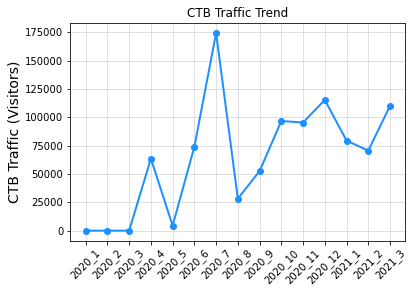

In [126]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Visitors'], color='dodgerblue', marker='o',linewidth=2 )
# set x-axis label
#ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_title('CTB Traffic Trend', fontsize=12)
ax.set_ylabel("CTB Traffic (Visitors)",color="Black",fontsize=14)
plt.grid(color='lightgrey', linewidth=0.7)
plt.savefig("chart5.png", bbox_inches='tight') 

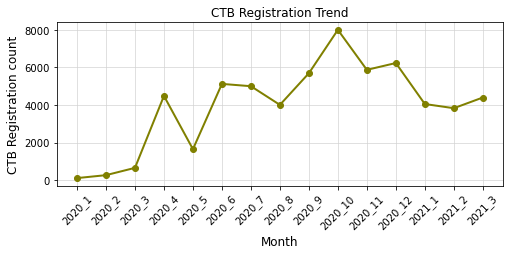

In [127]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['CTB Registration'], color='olive', marker='o', linewidth=2 )
# set x-axis label
ax.set_xlabel("Month",fontsize=12)
# set y-axis label
ax.set_title('CTB Registration Trend', fontsize=12)
ax.set_ylabel("CTB Registration count",color="Black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7)
plt.savefig("chart6.png", bbox_inches='tight') 

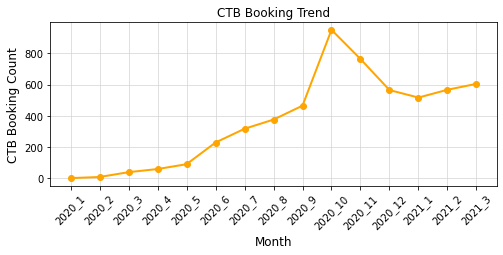

In [128]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Total CTB Booking'], color='orange', marker='o', linewidth=2 )
# set x-axis label
ax.set_xlabel("Month",fontsize=12)
ax.set_title('CTB Booking Trend', fontsize=12)
# set y-axis label
ax.set_ylabel("CTB Booking Count",color="black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7)
plt.savefig("chart7.png", bbox_inches='tight') 

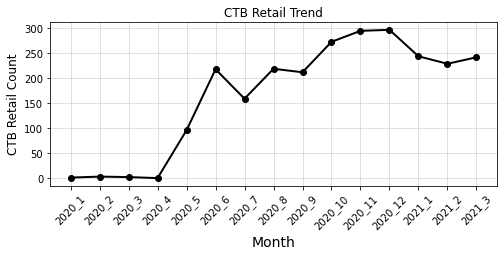

In [129]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)

#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Total Retail'], color='black', marker='o', linewidth=2 )
# set x-axis label
ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_title('CTB Retail Trend', fontsize=12)
ax.set_ylabel("CTB Retail Count",color="black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7)
plt.savefig("chart8.png", bbox_inches='tight') 

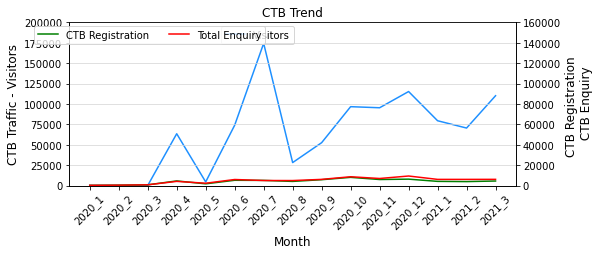

In [130]:
ax = plt.gca()

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Visitors', color="dodgerblue",legend=False,ax=ax,)
plt.xticks(np.arange(15), df.Month[0:15], rotation=45)
plt.ylim(ymax=200000, ymin=0)
#plt.subplots_adjust(left=0.15)
plt.ylabel("CTB Traffic - Visitors", fontsize=12)
plt.xlabel("Month", fontsize = 12)
ax.legend(loc='upper center', bbox_to_anchor=(0.421, 1.01), ncol=1)
ax2 = ax.twinx()
df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB Registration', legend=False, color='green', ax=ax2)
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Enquiry', legend=False, color='red', ax=ax2)
plt.ylim(ymax = 160000, ymin = 0)
#plt.xticks(np.arange(14), df.Month[0:14], rotation=45)

ax2.legend(loc='upper center', bbox_to_anchor=(0.179, 1.01), ncol=2)
plt.ylabel("CTB Registration \n CTB Enquiry" ,fontsize=12)
ax.set_title('CTB Trend', fontsize=12)
plt.rcParams["figure.figsize"] = (12,3)
plt.savefig("chart1.png", bbox_inches='tight')
plt.grid(color='lightgrey', linewidth=0.7)
plt.show()

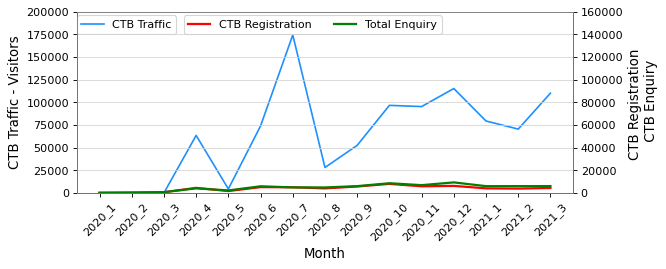

In [131]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='Visitors', color="dodgerblue",legend=False,ax=ax,)
plt.ylim(ymax=200000, ymin=0)
plt.ylabel("CTB Traffic - Visitors", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(np.arange(15), df['Month'][0:15], rotation=45)
#plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['CTB Traffic'],loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB Registration', legend=False, color='red',linewidth=2, ax=ax2)
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Enquiry', legend=False, color='green', linewidth=2, ax=ax2)

plt.ylim(ymax = 160000, ymin = 0)


plt.ylabel("CTB Registration \n CTB Enquiry",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.475, 1.01), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart1.png", bbox_inches='tight')
plt.show()

## chart 2 

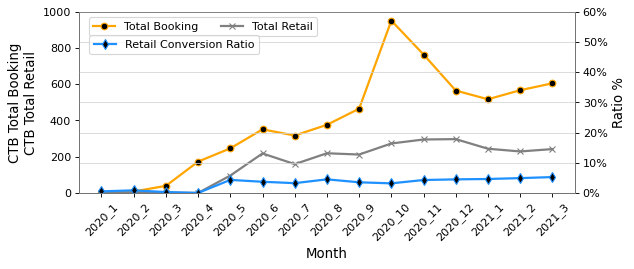

In [351]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()



df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Booking', color="orange",linewidth=2,legend=False,ax=ax,marker='o', markerfacecolor='black', markersize=6)
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Retail', legend=False, linewidth=2,color='grey', ax=ax, marker='x', markerfacecolor='black', markersize=6)
plt.xticks(np.arange(15), df['Month'][0:15], rotation=45)
plt.ylim(ymax=1000, ymin=0)
plt.ylabel("CTB Total Booking\nCTB Total Retail", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.25, 1.0), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Retail Conversion Ratio', legend=False,linewidth=2, color='dodgerblue',marker='d', markerfacecolor='black', markersize=6, ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.6, ymin = 0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
plt.ylabel("Ratio %",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.192, 0.9), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
    

#plt.savefig("chart2")
plt.savefig("chart2.png", bbox_inches='tight')               
plt.show()

## Weekly

In [133]:
df2= pd.read_excel("CTB_monthly_report_Mar.xlsx", sheet_name = "Weekly_Trend_final")

In [134]:
df2.head()

,Unnamed: 0,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count
0,0,2020_10,105,0.0,9.0,NaN
1,1,2020_11,102,2.0,10.0,NaN
2,2,2020_12,160,3.0,7.0,2.0
3,3,2020_13,255,3.0,5.0,NaN
4,4,2020_14,287,6.0,0.0,NaN


In [135]:
df2[['year','Week Number']] = df2['ORDER_DATEWeekKey'].str.split("_",expand=True)
df2.head()

,Unnamed: 0,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,year,Week Number
0,0,2020_10,105,0.0,9.0,NaN,2020,10
1,1,2020_11,102,2.0,10.0,NaN,2020,11
2,2,2020_12,160,3.0,7.0,2.0,2020,12
3,3,2020_13,255,3.0,5.0,NaN,2020,13
4,4,2020_14,287,6.0,0.0,NaN,2020,14


In [136]:
from natsort import natsorted
from natsort import natsorted, index_natsorted, order_by_index

#df2=natsorted(df2,df2['ORDER_DATEWeekKey'],)
df2 = df2.reindex(index=order_by_index(df2.index, index_natsorted(df2.ORDER_DATEWeekKey)))

In [137]:
df2[['year','Week Number']] = df2['ORDER_DATEWeekKey'].str.split("_",expand=True)
df2

,Unnamed: 0,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,year,Week Number
20,20,2020_3,64,NaN,NaN,NaN,2020,3
31,31,2020_4,66,NaN,NaN,NaN,2020,4
42,42,2020_5,62,0.0,1.0,1.0,2020,5
47,47,2020_6,69,0.0,1.0,1.0,2020,6
48,48,2020_7,118,0.0,2.0,NaN,2020,7
...,...,...,...,...,...,...,...,...
52,52,2021_10,1151,44.0,86.0,49.0,2021,10
53,53,2021_11,1016,54.0,69.0,60.0,2021,11
54,54,2021_12,1006,85.0,99.0,72.0,2021,12
55,55,2021_13,516,42.0,35.0,25.0,2021,13


In [138]:
df2 = df2.rename(columns={'Enquiry Count': 'CTB Enquiry', 'Retail Count': 'CTB Retail'})
df2

,Unnamed: 0,ORDER_DATEWeekKey,CTB Enquiry,CTB_BOOKING_Y,CTB_BOOKING_N,CTB Retail,year,Week Number
20,20,2020_3,64,NaN,NaN,NaN,2020,3
31,31,2020_4,66,NaN,NaN,NaN,2020,4
42,42,2020_5,62,0.0,1.0,1.0,2020,5
47,47,2020_6,69,0.0,1.0,1.0,2020,6
48,48,2020_7,118,0.0,2.0,NaN,2020,7
...,...,...,...,...,...,...,...,...
52,52,2021_10,1151,44.0,86.0,49.0,2021,10
53,53,2021_11,1016,54.0,69.0,60.0,2021,11
54,54,2021_12,1006,85.0,99.0,72.0,2021,12
55,55,2021_13,516,42.0,35.0,25.0,2021,13


In [139]:
df2['Conversion Ratio'] = df2['CTB Retail'] / df2['CTB Enquiry']

In [140]:
df2

,Unnamed: 0,ORDER_DATEWeekKey,CTB Enquiry,CTB_BOOKING_Y,CTB_BOOKING_N,CTB Retail,year,Week Number,Conversion Ratio
20,20,2020_3,64,NaN,NaN,NaN,2020,3,NaN
31,31,2020_4,66,NaN,NaN,NaN,2020,4,NaN
42,42,2020_5,62,0.0,1.0,1.0,2020,5,0.016129
47,47,2020_6,69,0.0,1.0,1.0,2020,6,0.014493
48,48,2020_7,118,0.0,2.0,NaN,2020,7,NaN
...,...,...,...,...,...,...,...,...,...
52,52,2021_10,1151,44.0,86.0,49.0,2021,10,0.042572
53,53,2021_11,1016,54.0,69.0,60.0,2021,11,0.059055
54,54,2021_12,1006,85.0,99.0,72.0,2021,12,0.071571
55,55,2021_13,516,42.0,35.0,25.0,2021,13,0.048450


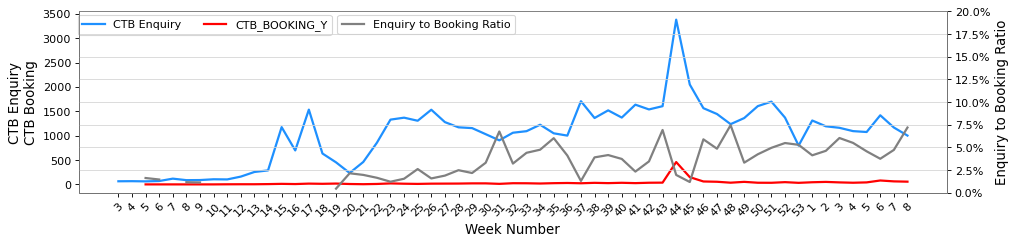

In [141]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(14, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




df2[0:59].plot(kind='line',x='Week Number',y='CTB Enquiry', linewidth=2, color="dodgerblue",legend=False,ax=ax,)
df2[0:59].plot(kind='line',x='Week Number',y='CTB_BOOKING_Y', linewidth=2,legend=False, color='red', ax=ax)
plt.ylabel("CTB Enquiry\nCTB Booking", fontsize=12)
plt.xlabel("Week Number", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(59), df2['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.145, 1.01), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df2[0:59].plot(kind='line',x='Week Number',y='Conversion Ratio',linewidth=2, legend=False, color='grey', ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.2, ymin = 0)
plt.xticks(np.arange(59), df2['Week Number'][0:59], rotation=45)
plt.ylabel("Enquiry to Booking Ratio",fontsize=12)

ax2.legend(['Enquiry to Booking Ratio'],loc='upper center', bbox_to_anchor=(0.40, 1.01), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart3.png", bbox_inches='tight')        
plt.show()

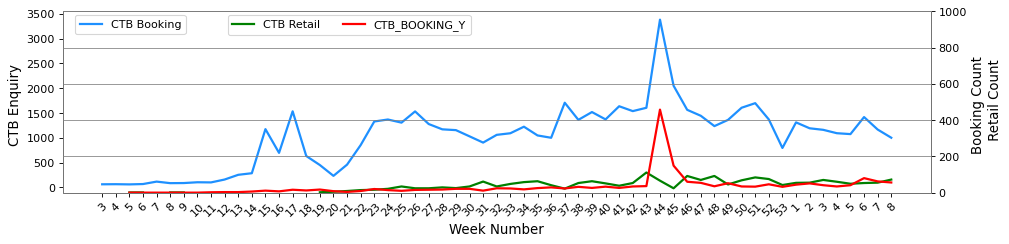

In [142]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df2[0:59].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB Enquiry',linewidth=2, color="dodgerblue",legend=False,ax=ax,)
#df3[0:59].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("CTB Enquiry ", fontsize=12)
plt.xlabel("Week Number", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(59), df2['Week Number'][0:59], rotation=45)
ax.legend(['CTB Booking'],loc='upper center', bbox_to_anchor=(0.078, 1.01), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df2[0:59].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB Retail',linewidth=2, legend=False, color='green', ax=ax2)
df2[0:59].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB_BOOKING_Y',linewidth=2, legend=False, color='red', ax=ax2)

plt.ylim(ymax = 1000, ymin = 0)
plt.xticks(np.arange(59), df2['Week Number'][0:59], rotation=45)
plt.ylabel("Booking Count \n Retail Count",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.33, 1.01), ncol=2)
plt.grid(color='grey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart4.png", bbox_inches='tight')         
plt.show()

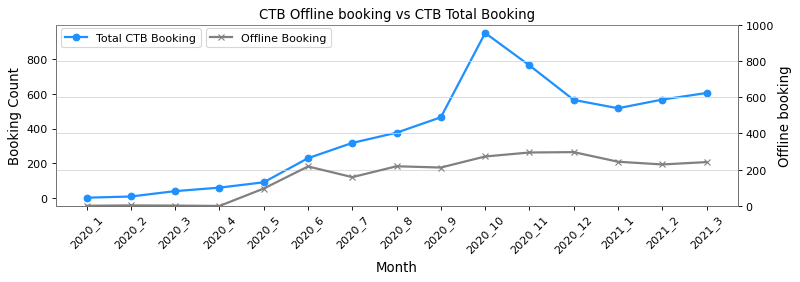

In [143]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', color="dodgerblue",linewidth=2,legend=False,marker ='o',ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(rotation=45)
#plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.11, 1.01), ncol=2)


#plt.subplots_adjust(left=0.15)
plt.title("CTB Offline booking vs CTB Total Booking")


ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Retail', legend=False,linewidth=2, color='grey',marker ='x', ax=ax2)

plt.ylim(ymax = 1000, ymin = 0)
plt.xticks(np.arange(15), df['ORDER_DATEMonthKey'][0:15],rotation=45)

plt.ylabel("Offline booking",fontsize=12)
ax2.legend(['Offline Booking'],loc='upper center', bbox_to_anchor=(0.312, 1.01), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("##9.png", bbox_inches='tight')         
plt.show()

#chart9")

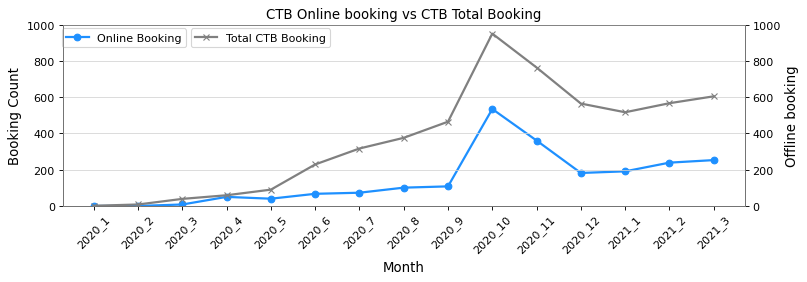

In [144]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_Y', color="dodgerblue",legend=False,marker="o",ax=ax,linewidth=2)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=1000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['Online Booking'],loc='upper center', bbox_to_anchor=(0.09, 1.01), ncol=2)

plt.title("CTB Online booking vs CTB Total Booking")
#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', legend=False, color='grey', marker="x", linewidth=2,ax=ax2)

plt.ylim(ymax = 1000, ymin = 0)
plt.xticks(np.arange(15), df['ORDER_DATEMonthKey'][0:15], rotation=45)

plt.ylabel("Offline booking",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.29, 1.01), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#10.png", bbox_inches='tight')       
plt.show()
#plt.savefig("chart10.png", bbox_inches='tight') 

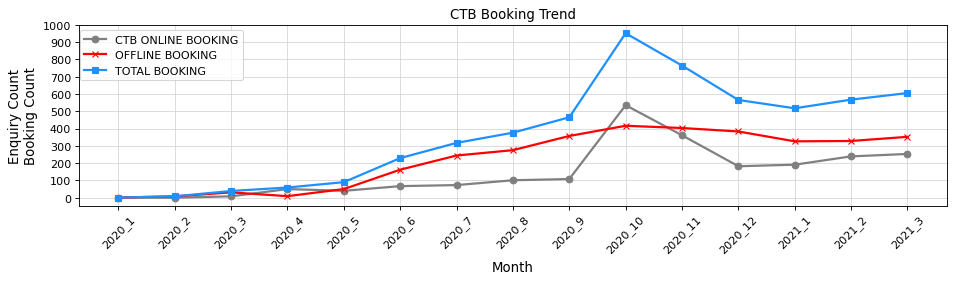

In [145]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.title("CTB Booking Trend")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_Y', color="grey",legend=False,ax=ax,linewidth=2, marker='o')
df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_N', legend=False, color='red', ax=ax,linewidth=2,marker='x')
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', legend=False, color='dodgerblue', ax=ax,linewidth=2,marker='s')
plt.yticks(np.arange(0, 1100, 100))
ax.legend(["CTB ONLINE BOOKING" , "OFFLINE BOOKING" , "TOTAL BOOKING"],loc='upper center', bbox_to_anchor=(0.095, 1.0), ncol=1)
plt.ylabel("Enquiry Count\nBooking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)

plt.xticks(np.arange(15), df['ORDER_DATEMonthKey'][0:15], rotation=45)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
#ax.legend(loc='upper center', bbox_to_anchor=(0.26, 1.0), ncol=2)
#ax2 = ax.twinx()


plt.yticks(np.arange(0, 1100, 100))
plt.savefig("#11.jpg", bbox_inches='tight') 
plt.grid(color='lightgrey', linewidth=0.7)
plt.show()

In [146]:
df3= pd.read_excel("CTB_monthly_report_16Mar.xlsx", sheet_name = "Hourly_Trend_final")

In [147]:
df3['Booking Count'].sum()

2296

In [148]:
df3

,Unnamed: 0,Range_name,Enquiry Count,Booking Count
0,0,0-2,2571,32
1,1,10-12,7923,323
2,2,12-14,8033,363
3,3,14-16,8238,336
4,4,16-18,7399,347
5,5,18-20,7664,268
6,6,2-4,952,11
7,7,20-22,7786,223
8,8,22-24,6321,123
9,9,4-6,1038,12


In [149]:
df3 = df3.reindex(index=order_by_index(df3.index, index_natsorted(df3.Range_name)))

In [150]:
df3

,Unnamed: 0,Range_name,Enquiry Count,Booking Count
0,0,0-2,2571,32
6,6,2-4,952,11
9,9,4-6,1038,12
10,10,6-8,2805,86
11,11,8-10,5062,172
1,1,10-12,7923,323
2,2,12-14,8033,363
3,3,14-16,8238,336
4,4,16-18,7399,347
5,5,18-20,7664,268


In [151]:
df3['Enquiry Count'].sum()

65792

In [152]:
df3['Enquiry %'] = (df3['Enquiry Count'] /65792 )*100

In [153]:
df3['Enquiry %']

0      3.907770
6      1.446984
9      1.577699
10     4.263436
11     7.693945
1     12.042498
2     12.209691
3     12.521279
4     11.246048
5     11.648833
7     11.834266
8      9.607551
Name: Enquiry %, dtype: float64

In [154]:
df3['Enquiry %'] = df3['Enquiry %'].round(2).astype(str)+ '%'

In [155]:
df3

,Unnamed: 0,Range_name,Enquiry Count,Booking Count,Enquiry %
0,0,0-2,2571,32,3.91%
6,6,2-4,952,11,1.45%
9,9,4-6,1038,12,1.58%
10,10,6-8,2805,86,4.26%
11,11,8-10,5062,172,7.69%
1,1,10-12,7923,323,12.04%
2,2,12-14,8033,363,12.21%
3,3,14-16,8238,336,12.52%
4,4,16-18,7399,347,11.25%
5,5,18-20,7664,268,11.65%


In [156]:
df3['Booking Count'].sum()

2296

In [157]:
df3['Booking %'] = (df3['Booking Count'] /2296)*100

In [158]:
df3['Booking %'] = df3['Booking %'].round(2).astype(str)+ '%'

In [159]:
df3

,Unnamed: 0,Range_name,Enquiry Count,Booking Count,Enquiry %,Booking %
0,0,0-2,2571,32,3.91%,1.39%
6,6,2-4,952,11,1.45%,0.48%
9,9,4-6,1038,12,1.58%,0.52%
10,10,6-8,2805,86,4.26%,3.75%
11,11,8-10,5062,172,7.69%,7.49%
1,1,10-12,7923,323,12.04%,14.07%
2,2,12-14,8033,363,12.21%,15.81%
3,3,14-16,8238,336,12.52%,14.63%
4,4,16-18,7399,347,11.25%,15.11%
5,5,18-20,7664,268,11.65%,11.67%


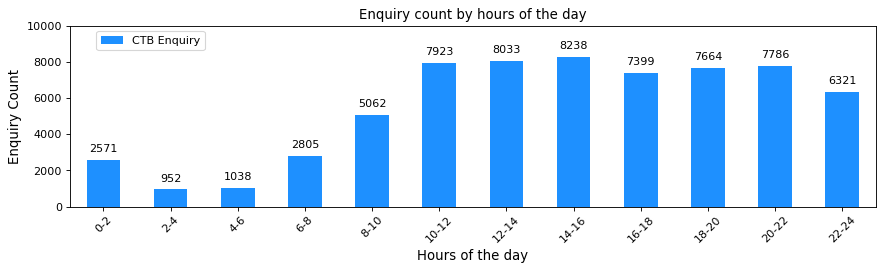

In [160]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df3.plot(kind='bar',x='Range_name',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Hours of the day", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["CTB Enquiry"],loc="upper center", bbox_to_anchor=(0.1, 1.0))


plt.title("Enquiry count by hours of the day")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#12.jpg", bbox_inches='tight')      
plt.show()


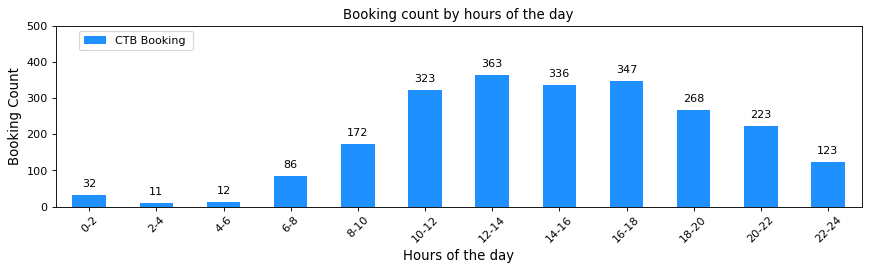

In [161]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df3.plot(kind='bar',x='Range_name',y='Booking Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')             
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Hours of the day", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=500, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["CTB Booking "],loc="upper center", bbox_to_anchor=(0.1, 1.0))


plt.title("Booking count by hours of the day")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#13.jpg", bbox_inches='tight')       
plt.show()

## Dealer

In [162]:
df4 = pd.read_excel("CTB_monthly_report_16Mar.xlsx", sheet_name = "Region_final")

In [163]:
df4.head(2)

,Unnamed: 0,Dealer Region Name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio,Avg_Enquiry,Avg_booking
0,0,Central RO1,5048,441,0.076727,0.079417,0.087361,3870.117647,326.647059
1,1,Central RO2,5889,465,0.089509,0.083739,0.078961,3870.117647,326.647059


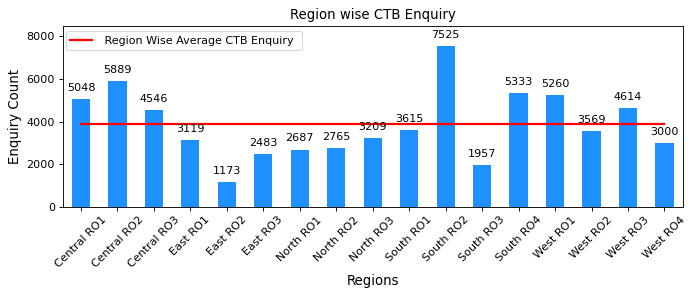

In [164]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

df4.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = df4.plot(kind='bar',x='Dealer Region Name',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)#
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=8500, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Region wise CTB Enquiry", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend([" Region Wise Average CTB Enquiry "],loc="upper center", bbox_to_anchor=(0.195, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.savefig("#18.jpg", bbox_inches='tight')      
plt.show()

In [165]:
df4['Enq to Booking Ratio']= df4['Enq to Booking Ratio'] * 100 

In [166]:
df4['Enquiry to booking ratio']= df4['Enq to Booking Ratio'].round(2).astype(str)+ '%'

In [167]:
data = df4[['Dealer Region Name','Enquiry to booking ratio','Enquiry Count','Booking Count']]
data

,Dealer Region Name,Enquiry to booking ratio,Enquiry Count,Booking Count
0,Central RO1,8.74%,5048,441
1,Central RO2,7.9%,5889,465
2,Central RO3,8.23%,4546,374
3,East RO1,9.91%,3119,309
4,East RO2,6.82%,1173,80
5,East RO3,9.14%,2483,227
6,North RO1,9.08%,2687,244
7,North RO2,6.8%,2765,188
8,North RO3,11.37%,3209,365
9,South RO1,8.91%,3615,322


In [367]:
df4['Booking Count'].max()

551

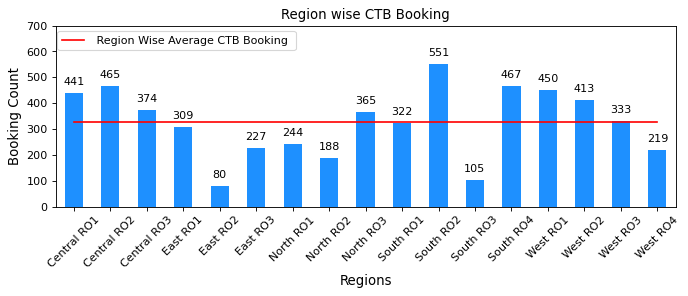

In [168]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

df4.plot(kind='line',x='Dealer Region Name', y='Avg_booking', color='red',ax=ax)
splot = df4.plot(kind='bar',x='Dealer Region Name',y='Booking Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=700, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.16, 1.01), ncol=2)

plt.title("Region wise CTB Booking", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend([" Region Wise Average CTB Booking "],loc="upper center", bbox_to_anchor=(0.195, 1.0))

plt.savefig("#19.jpg", bbox_inches='tight')        
plt.show()

In [169]:
df4['Enquiry Count'].sum()

65792

In [170]:
df4['Booking Count'].sum()

5553

## Model 

In [171]:
df5 = pd.read_excel("CTB_monthly_report_16Mar.xlsx", sheet_name = "model_final")

In [172]:
df5.head(2)

,Unnamed: 0,MODEL,EQCR_MODEL_NAME,Enquiry Count,Booking Count,_merge,Enq to Booking Ratio
0,0,AURA,AURA,3474,258.0,both,0.074266
1,1,All New i20,All New i20,6178,1178.0,both,0.190677


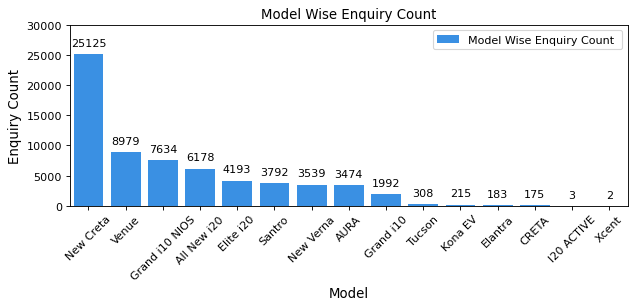

In [173]:
df5 = df5.reindex(index=order_by_index(df5.index, index_natsorted(df5['Enquiry Count'],reverse=True)))
from matplotlib.pyplot import figure
#from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df5, x = 'MODEL', y = 'Enquiry Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points') 
        

#ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax=30000, ymin=0)
ax.set_ylabel('Enquiry Count',fontsize=12)
#ax.legend()
plt.xticks(rotation=45)
plt.xlabel("Model",fontsize=12)
ax.legend(["Model Wise Enquiry Count "],loc="upper center", bbox_to_anchor=(0.82, 1.0))
plt.title("Model Wise Enquiry Count",fontsize=12)
plt.savefig("#20model.jpg", bbox_inches='tight')
plt.show()


In [174]:
df5['Enquiry Count'].sum()

65792

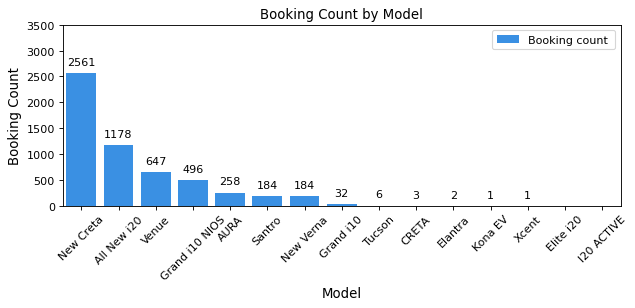

In [175]:
df5 = df5.reindex(index=order_by_index(df5.index, index_natsorted(df5['Booking Count'],reverse=True)))
from matplotlib.pyplot import figure
#from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df5, x = 'MODEL', y = 'Booking Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points') 
        

#ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax=3500, ymin=0)
ax.set_ylabel('Booking Count',fontsize=12)
#ax.legend()
plt.xticks(rotation=45)
plt.xlabel("Model",fontsize=12)
ax.legend(["Booking count "],loc="upper center", bbox_to_anchor=(0.88, 1.0))
plt.title("Booking Count by Model",fontsize=12)
plt.savefig("#21.jpg", bbox_inches='tight')
plt.show()


In [176]:
df5.sort_values("Enquiry Count", axis = 0, ascending = False, inplace = True, na_position ='last') 


In [177]:
df5

,Unnamed: 0,MODEL,EQCR_MODEL_NAME,Enquiry Count,Booking Count,_merge,Enq to Booking Ratio
9,9,New Creta,New Creta,25125,2561.0,both,0.101930
13,13,Venue,Venue,8979,647.0,both,0.072057
6,6,Grand i10 NIOS,Grand i10 NIOS,7634,496.0,both,0.064972
1,1,All New i20,All New i20,6178,1178.0,both,0.190677
4,4,Elite i20,NaN,4193,NaN,left_only,NaN
11,11,Santro,Santro,3792,184.0,both,0.048523
10,10,New Verna,New Verna,3539,184.0,both,0.051992
0,0,AURA,AURA,3474,258.0,both,0.074266
5,5,Grand i10,Grand i10,1992,32.0,both,0.016064
12,12,Tucson,Tucson,308,6.0,both,0.019481


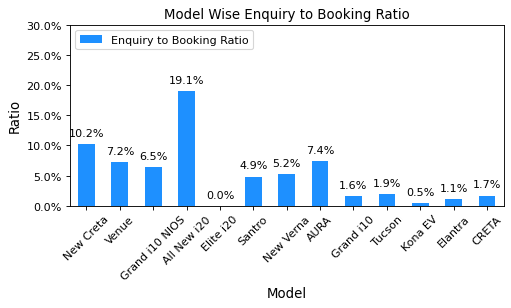

In [368]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df5[0:13].plot(kind='bar',x='MODEL',y='Enq to Booking Ratio', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Ratio", fontsize=12)
plt.xlabel("Model", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=0.3, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Model Wise Enquiry to Booking Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#22.jpg", bbox_inches='tight')      
plt.show()

In [179]:
df6 = pd.read_excel("CTB_monthly_report_Mar.xlsx", sheet_name = "variant_final")

In [180]:
df6.head()

,Unnamed: 0,Variant Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,0,High,9380,994,0.16610,0.202568,0.017602
1,1,Low,24052,1790,0.42591,0.364785,0.031697
2,2,Mid,23040,2123,0.40799,0.432647,0.037594


In [181]:
df_var = {'Variant Type':['Low', 'Med', 'High'],
        'Enquiry Count':[24052,23040,9380],
        'Booking Count':[1790,2123,994],
        'Enquiry to Booking Ratio':[0.031697,0.037594,0.017602]}

In [182]:
df_variant = pd.DataFrame(df_var)

In [183]:
df_variant

,Variant Type,Enquiry Count,Booking Count,Enquiry to Booking Ratio
0,Low,24052,1790,0.031697
1,Med,23040,2123,0.037594
2,High,9380,994,0.017602


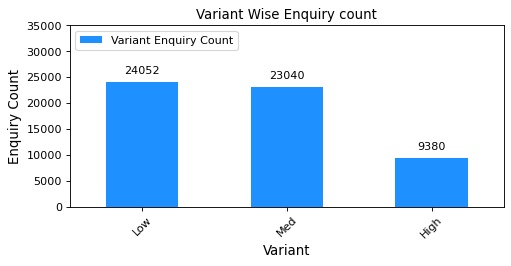

In [184]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = df_variant.plot(kind='bar',x='Variant Type',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=35000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Variant Enquiry Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant Wise Enquiry count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#23.jpg", bbox_inches='tight')       
plt.show()

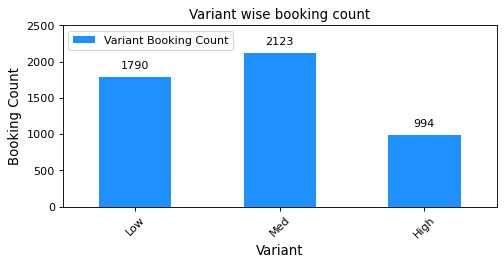

In [185]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_variant.plot(kind='bar',x='Variant Type',y='Booking Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=2500, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Variant Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant wise booking count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#24.jpg", bbox_inches='tight')       
plt.show()

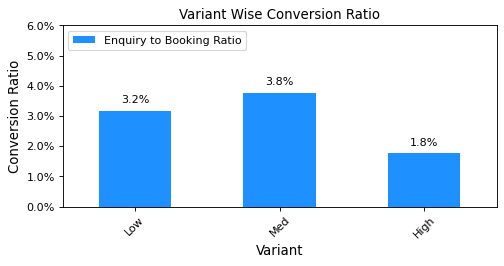

In [186]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_variant.plot(kind='bar',x='Variant Type',y='Enquiry to Booking Ratio', color="dodgerblue",legend=False,ax=ax,)



for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Conversion Ratio", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=0.06, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant Wise Conversion Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

        
plt.savefig("#25.jpg", bbox_inches='tight')       
plt.show()

In [187]:
df7 = pd.read_excel("CTB_monthly_report_Mar.xlsx", sheet_name = "body_final")

In [188]:
df7.head()

,Unnamed: 0,Body Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,0,HatchBack,23789,1890,0.362560,0.340357,0.028805
1,1,SUV,34412,3217,0.524461,0.579326,0.049029
2,2,Sedan,7413,446,0.112979,0.080317,0.006797


In [189]:
df_bod = {'Body Type':['HatchBack', 'Sedan', 'SUV'],
        'Enquiry Count':[23789,7413,34412],
        'Booking Count':[1890,446,3217],
        'Enq to Booking Ratio':[0.028805,0.006797,0.049029]}

In [190]:
df_body = pd.DataFrame(df_bod)

In [191]:
df_body

,Body Type,Enquiry Count,Booking Count,Enq to Booking Ratio
0,HatchBack,23789,1890,0.028805
1,Sedan,7413,446,0.006797
2,SUV,34412,3217,0.049029


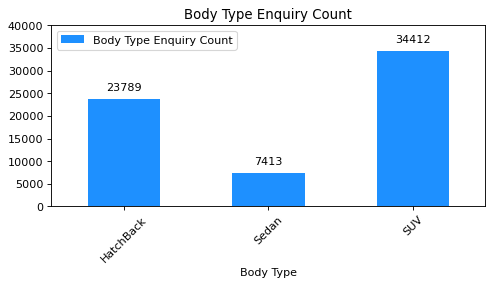

In [192]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_body.plot(kind='bar',x='Body Type',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        
plt.ylim(ymax=40000, ymin=0)
plt.xticks(rotation=45)
plt.title("Body Type Enquiry Count")
ax.legend(["Body Type Enquiry Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.savefig("#26body.jpg", bbox_inches='tight') 
plt.show()

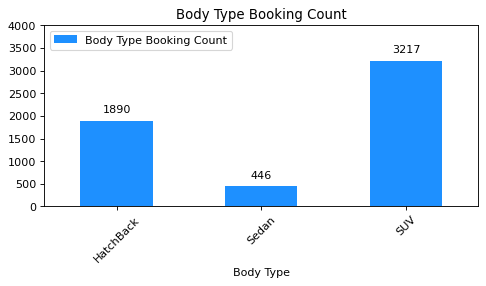

In [193]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_body.plot(kind='bar',x='Body Type',y='Booking Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        
plt.ylim(ymax=4000, ymin=0)
plt.xticks(rotation=45)
plt.title("Body Type Booking Count")
ax.legend(["Body Type Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.savefig("#27body.jpg", bbox_inches='tight') 
plt.show()

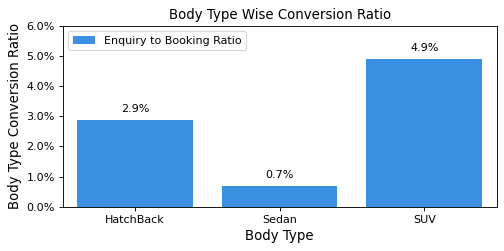

In [194]:

# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df_body, x = 'Body Type', y = 'Enq to Booking Ratio', ci = None, color="dodgerblue")



for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Body Type Conversion Ratio", fontsize=12)
plt.xlabel("Body Type", fontsize = 12)
plt.xticks(rotation=0)
plt.ylim(ymax=0.06, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Body Type Wise Conversion Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

        
plt.savefig("#28body.jpg", bbox_inches='tight')       
plt.show()




In [195]:
df7 = pd.read_excel("CTB_monthly_report_Mar.xlsx", sheet_name = "fuel_final")

In [196]:
df7.head(2)

,Unnamed: 0,Fuel Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,0,CNG,2577,202,0.039169,0.036436,0.003070
1,1,Diesel,15187,1439,0.230834,0.259560,0.021872


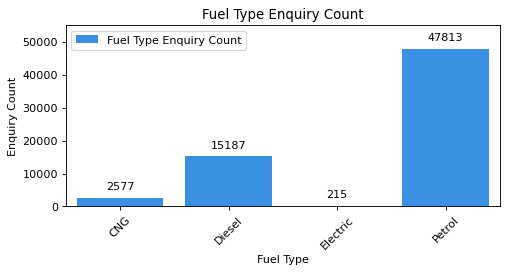

In [197]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Enquiry Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        

plt.xticks(rotation=45)
plt.ylim(ymax=55000, ymin=0)
plt.title("Fuel Type Enquiry Count")
ax.legend(["Fuel Type Enquiry Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.savefig("#29fuel.jpg", bbox_inches='tight')
plt.show()

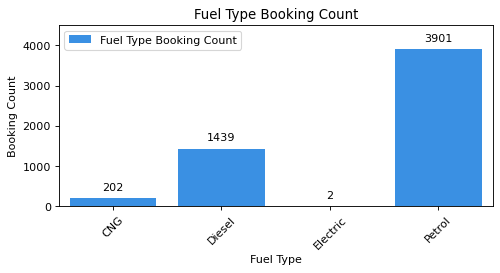

In [198]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Booking Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        

plt.xticks(rotation=45)
plt.ylim(ymax=4500, ymin=0)
plt.title("Fuel Type Booking Count")
ax.legend(["Fuel Type Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.savefig("#29fuel.jpg", bbox_inches='tight')
plt.show()

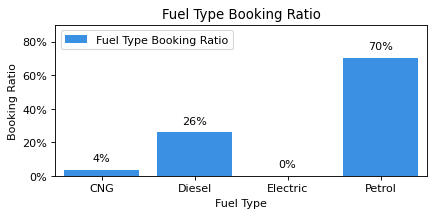

In [199]:

from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 2.5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


#plt.figure(figsize=(6, 3))
splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Booking Ratio', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
        
plt.ylim(ymax=0.9, ymin=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.legend(["Fuel Type Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.title("Fuel Type Booking Ratio")
plt.savefig("#31fuel.jpg", bbox_inches='tight')

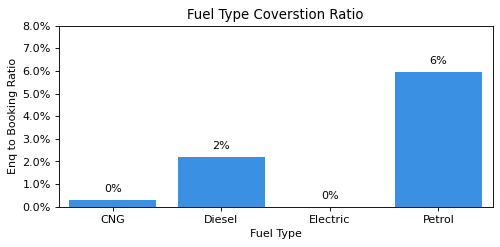

In [200]:

from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


#plt.figure(figsize=(6, 3))
splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Enq to Booking Ratio', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
        
plt.ylim(ymax=0.08, ymin=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Fuel Type Coverstion Ratio")
plt.savefig("#31fuel.jpg", bbox_inches='tight')

## Zone

In [201]:
GDMS_booking_north = Zone(GDMS_booking_region,"North")
GDMS_booking_east = Zone(GDMS_booking_region,"East")
GDMS_booking_west = Zone(GDMS_booking_region,"West")
GDMS_booking_south = Zone(GDMS_booking_region,"South")
GDMS_booking_central = Zone(GDMS_booking_region,"Central")

North :-  479 318 797 0.6010037641154329 0.3989962358845671
East :-  380 236 616 0.6168831168831169 0.38311688311688313
West :-  960 455 1415 0.6784452296819788 0.3215547703180212
South :-  819 626 1445 0.5667820069204152 0.43321799307958475
Central :-  707 573 1280 0.55234375 0.44765625


In [202]:
frames = [GDMS_booking_north, GDMS_booking_east,GDMS_booking_west,GDMS_booking_south, GDMS_booking_central]

In [203]:
ctb_zones = pd.concat(frames)

In [204]:
ctb_zones

,BKNG_DATE_NEWMonthKey,Offline Booking,Online Booking,Total Booking
0,2020_10,46,71,117
1,2020_11,47,45,92
2,2020_12,40,22,62
3,2020_3,2,2,4
4,2020_4,3,7,10
...,...,...,...,...
10,2020_8,62,22,84
11,2020_9,76,27,103
12,2021_1,43,67,110
13,2021_2,73,102,175


In [205]:
df8 = pd.read_excel("CTB_auto_monthly_report_Mar_Zone.xlsx", sheet_name = "GDMS_booking_north")

In [206]:
df8.head(14)

,Unnamed: 0,BKNG_DATE_NEWMonthKey,Offline Booking,Online Booking,Total Booking
0,0,2020_10,46,71,117
1,1,2020_11,47,45,92
2,2,2020_12,40,22,62
3,3,2020_3,2,2,4
4,4,2020_4,3,7,10
5,5,2020_5,9,4,13
6,6,2020_6,23,7,30
7,7,2020_7,28,10,38
8,8,2020_8,30,15,45
9,9,2020_9,45,17,62


In [207]:
df8 = df8.reindex(index=order_by_index(df8.index, index_natsorted(df8.BKNG_DATE_NEWMonthKey)))

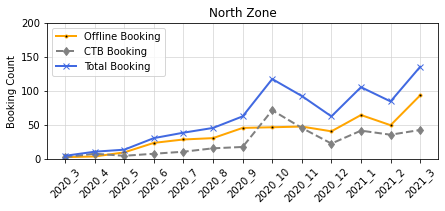

In [344]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df8, marker='o', markerfacecolor='black', markersize=3, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df8, marker='d', color='grey', linestyle='dashed', label="CTB Booking",linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df8, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=200, ymin=0)
plt.title("North Zone" )
plt.ylabel("Booking Count")

# show legend
#plt.legend(['Offline Booking'\n 'Online Booking'\n 'Total Booking'],loc="upper left", bbox_to_anchor=(0.0, 1.0)
plt.legend(loc='upper left')
# show graph
plt.grid(color='lightgrey', linewidth=0.7) 
plt.savefig("#32North.jpg", bbox_inches='tight')
plt.show()

In [209]:
df8['Online Booking'].sum()

318

In [210]:
df8['Offline Booking'].sum()

479

In [211]:
df81 = pd.read_excel("CTB_auto_monthly_report_Mar_Zone.xlsx", sheet_name = "GDMS_booking_east")
df81 = df81.reindex(index=order_by_index(df81.index, index_natsorted(df81.BKNG_DATE_NEWMonthKey)))

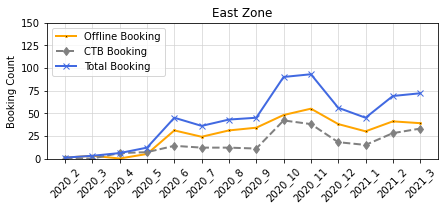

In [339]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df81, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df81, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df81, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=150, ymin=0)
plt.title("East Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc="upper left")
plt.grid(color='lightgrey', linewidth=0.7)
plt.savefig("#33East.jpg", bbox_inches='tight')
#plt.grid(color='lightgrey', linewidth=0.7)
# show graph
plt.show()

In [213]:
df81['Online Booking'].sum()

236

In [214]:
df81['Offline Booking'].sum()

380

In [215]:
df82 = pd.read_excel("CTB_auto_monthly_report_Mar_Zone.xlsx", sheet_name = "GDMS_booking_west")

In [216]:
df82 = df82.reindex(index=order_by_index(df82.index, index_natsorted(df82.BKNG_DATE_NEWMonthKey)))

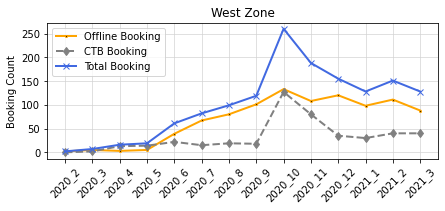

In [340]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df82, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df82, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df82, marker='x', color='royalblue', linewidth=2)
plt.title("West Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc='upper left')

plt.grid(color='lightgrey', linewidth=0.7)
plt.savefig("#33Westzone.jpg", bbox_inches='tight')
# show graph
plt.show()

In [218]:
df82['Online Booking'].sum()

455

In [219]:
df82['Offline Booking'].sum()

960

In [220]:
df83 = pd.read_excel("CTB_auto_monthly_report_Mar_Zone.xlsx", sheet_name = "GDMS_booking_south")

In [221]:
df83 = df83.reindex(index=order_by_index(df83.index, index_natsorted(df83.BKNG_DATE_NEWMonthKey)))

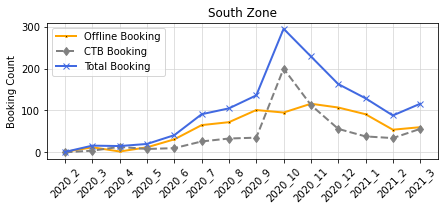

In [341]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df83, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df83, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df83, marker='x', color='royalblue', linewidth=2)
plt.title("South Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend()
plt.grid(color='lightgrey', linewidth=0.7)
plt.savefig("#34southzone.jpg", bbox_inches='tight')

# show graph
plt.show()

In [223]:
df83['Online Booking'].sum()

626

In [224]:
df83['Offline Booking'].sum()

819

In [225]:
df84 = pd.read_excel("CTB_auto_monthly_report_Mar_Zone.xlsx", sheet_name = "GDMS_booking_central")

In [226]:
df84 = df84.reindex(index=order_by_index(df84.index, index_natsorted(df84.BKNG_DATE_NEWMonthKey)))

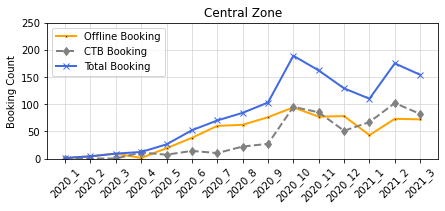

In [342]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df84, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df84, marker='d', color='grey',linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df84, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=250, ymin=0)
plt.title("Central Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc='upper left')
plt.grid(color='lightgrey', linewidth=0.7)
plt.savefig("#35Centralzone.jpg", bbox_inches='tight')
# show graph
plt.show()

In [228]:
df84['Online Booking'].sum()

573

In [229]:
df84['Offline Booking'].sum()

707

## EBR

EBR COUNT FOR MARCH 

E - 355252
B - 80431
R - 53499

NOTE : Pure offline = E - (CTB+FINANCE)
FOR EG: feb
355239 - 6008 = 349231 

In [230]:
xEQ_Pure_Offline = 355252 - 5915
xEQ_Pure_Offline

349337

In [231]:
xBook_Pure_Offline = 80431 - 605
xBook_Pure_Offline

79826

In [232]:
xRetail_Pure_Offline = 53499- 242
xRetail_Pure_Offline

53257

In [355]:
import pandas as pd
  
# intialise data of lists.
df_EBR = {'Month':['Jan20', 'Feb20', 'Mar20', 'Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21'],
        'EQ_Pure_Offline':[331139,342730,283911,20818,95886,275224,287142,289506,336103,337111,347013,411500,353202,349231,349337],
        'EQ_CTB_generated':[187,348,686,3997,2224,5888,4901,4856,6011,8590,6887,9314,5998,6008,5915],
        'Book_Pure_Offline':[52318,51783,48670,1056,14906,46980,57238,66792,56737,73108,84866,82734,78059,78579,79826],
        'Book_CTB_generated':[1,8,39,59,90,229,317,376,465,951,761,565,517,567,605],
        'Retail_Pure_Offline':[41000,38498,20352,36,10792,30823,37374,43400,37958,53650,55312,56849,47283,50588,53257],
        'Retail_CTB_generated':[1,3,2,0,30,106,159,219,212,274,296,297,243,229,242],
         'Month_y':['2020-Jan', '2020-Feb', '2020-Mar', '2020-Apr','2020-May','2020-Jun','2020-Jul','2020-Aug','2020-Sep','2020-Oct','2020-Nov','2020-Dec','2021-Jan','2021-Feb','2021-Mar']}
  
# Create DataFrame
EBR = pd.DataFrame(df_EBR)
EBR




,Month,EQ_Pure_Offline,EQ_CTB_generated,Book_Pure_Offline,Book_CTB_generated,Retail_Pure_Offline,Retail_CTB_generated,Month_y
0,Jan20,331139,187,52318,1,41000,1,2020-Jan
1,Feb20,342730,348,51783,8,38498,3,2020-Feb
2,Mar20,283911,686,48670,39,20352,2,2020-Mar
3,Apr20,20818,3997,1056,59,36,0,2020-Apr
4,May20,95886,2224,14906,90,10792,30,2020-May
5,Jun20,275224,5888,46980,229,30823,106,2020-Jun
6,Jul20,287142,4901,57238,317,37374,159,2020-Jul
7,Aug20,289506,4856,66792,376,43400,219,2020-Aug
8,Sep20,336103,6011,56737,465,37958,212,2020-Sep
9,Oct20,337111,8590,73108,951,53650,274,2020-Oct


In [356]:
EBR['Offline EB'] = (EBR['Book_Pure_Offline']/EBR['EQ_Pure_Offline']).round(2)
EBR['Online EB'] = (EBR['Book_CTB_generated']/EBR['EQ_CTB_generated']).round(2)
EBR['Offline ER'] = (EBR['Retail_Pure_Offline']/EBR['EQ_Pure_Offline']).round(2)
EBR['Online ER'] = (EBR['Retail_CTB_generated']/EBR['EQ_CTB_generated']).round(2)

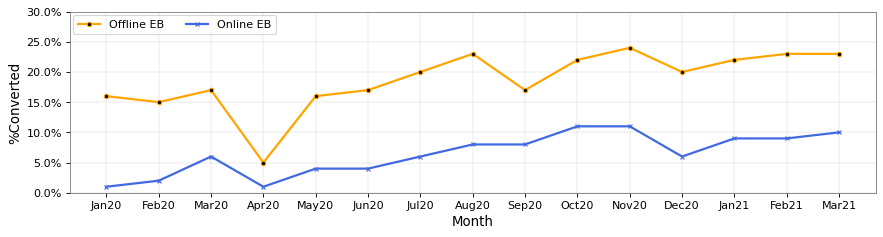

In [358]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




EBR.plot(kind='line',x='Month',y='Offline EB', linewidth=2, color="orange",legend=False,ax=ax, marker='o', markerfacecolor='black', markersize=4)
EBR.plot(kind='line',x='Month',y='Online EB', linewidth=2,legend=False, color='royalblue', ax=ax, marker='x', markerfacecolor='black', markersize=4)
plt.ylabel("%Converted", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(15), EBR['Month'][0:15], rotation=0)
ax.legend(loc='upper center', bbox_to_anchor=(0.13, 1.01), ncol=2)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.3, ymin = 0)
plt.grid(color='lightgrey', linewidth=0.4)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax.spines[pos].set_edgecolor('grey')
        
#plt.savefig("chart3.png", bbox_inches='tight')
plt.savefig("#ebr_eb.png", bbox_inches='tight')
plt.show()

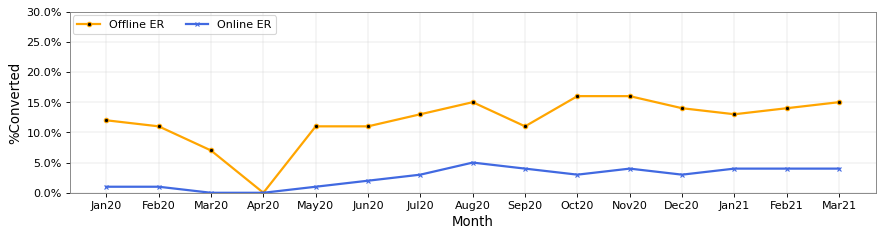

In [360]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




EBR.plot(kind='line',x='Month',y='Offline ER', linewidth=2, color="orange",legend=False,ax=ax, marker='o', markerfacecolor='black', markersize=4)
EBR.plot(kind='line',x='Month',y='Online ER', linewidth=2,legend=False, color='royalblue', marker='x', markerfacecolor='black', markersize=4, ax=ax)
plt.ylabel("%Converted", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(15), EBR['Month'][0:15], rotation=0)
ax.legend(loc='upper center', bbox_to_anchor=(0.13, 1.01), ncol=2)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.3, ymin = 0)
plt.grid(color='lightgrey', linewidth=0.4)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax.spines[pos].set_edgecolor('grey')
        
#plt.savefig("chart3.png", bbox_inches='tight')
plt.savefig("#17.png", bbox_inches='tight')
plt.savefig("#ebr_er.png", bbox_inches='tight')
plt.show()

In [237]:
EBR['EB_Diff'] = EBR['Offline EB'] - EBR['Online EB']
EBR['ER_Diff'] = EBR['Offline ER'] - EBR['Online ER']

In [238]:
EBR['EB_Diff'] = (EBR['EB_Diff'])*100
EBR['EB_Diff'] = EBR['EB_Diff'].round(2).astype(str)+ '%'

In [239]:
EBR['ER_Diff'] = (EBR['ER_Diff'])*100
EBR['ER_Diff'] = EBR['ER_Diff'].round(2).astype(str)+ '%'

In [240]:
EBR=EBR[['Month','EB_Diff','ER_Diff']]

In [241]:
EBR

,Month,EB_Diff,ER_Diff
0,Jan20,15.0%,11.0%
1,Feb20,13.0%,10.0%
2,Mar20,11.0%,7.0%
3,Apr20,4.0%,0.0%
4,May20,12.0%,10.0%
5,Jun20,13.0%,9.0%
6,Jul20,14.0%,10.0%
7,Aug20,15.0%,10.0%
8,Sep20,9.0%,7.0%
9,Oct20,11.0%,13.0%


## CUSTOMER INSIGHT

In [242]:
CTB_withsc1 = pd.read_excel("ctb_ord140421.xls",sheet_name='Sheet 1')
print(CTB_withsc1.shape)
CTB_withsc1.head(2)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(64999, 33)


,_REGION _CODE,DELR_RGON_NAME,_DEALER _ID,_DEALER _NAME,_ASSIGNED _SALES _CONSULTANT,_STATE,_CITY,_ORDER _ID,_ORDER _DATE,_ORDER _STATUS,...,_BOOKING (_Y/_N),_FINAL _PURCHASE _AMOUNT,_BOOKING _AMOUNT,_BALANCE _AMOUNT,_TRADE-IN (_Y/_N),_DEALER _CODE (_Y/_N),_DEAL _CODE _VALUE,BOOKING_DATE,INVC_CNFR_YN,PAY_AT_DELR_YN
0,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012816276904,28-JAN-2020 19:50:08,Cancellation,...,N,0,0,0,N,N,0,NaT,N,N
1,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD20202642245061,06-FEB-2020 15:19:11,Cancellation,...,N,0,0,0,N,N,0,NaT,N,N


In [243]:
CTB_withsc2 = pd.read_excel("ctb_ord140421.xls",sheet_name='Sheet 2')
print(CTB_withsc2.shape)
CTB_withsc2.head(2)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(10637, 33)


,_REGION _CODE,DELR_RGON_NAME,_DEALER _ID,_DEALER _NAME,_ASSIGNED _SALES _CONSULTANT,_STATE,_CITY,_ORDER _ID,_ORDER _DATE,_ORDER _STATUS,...,_BOOKING (_Y/_N),_FINAL _PURCHASE _AMOUNT,_BOOKING _AMOUNT,_BALANCE _AMOUNT,_TRADE-IN (_Y/_N),_DEALER _CODE (_Y/_N),_DEAL _CODE _VALUE,BOOKING_DATE,INVC_CNFR_YN,PAY_AT_DELR_YN
0,C1101,Central RO1,N1220,FRONTIER HYUNDAI,RANJAN OJHA,Delhi,Delhi,ORD2021013115641234,31-JAN-2021 20:52:11,Open,...,N,1039698,0,1039698,N,N,0,NaT,N,N
1,S1104,South RO4,S8230,LAKSHMI HYUNDAI,VANUSHA,Karnataka,Bangalore,ORD2021013118773154,31-JAN-2021 21:30:56,Open,...,N,1048982,0,1048982,N,N,0,NaT,N,N


In [244]:
frames = [CTB_withsc1,CTB_withsc2]
CTB_withsc = pd.concat(frames)
print(CTB_withsc.shape)
CTB_withsc.columns

(75636, 33)


Index(['_REGION _CODE', 'DELR_RGON_NAME', '_DEALER _ID', '_DEALER _NAME',
       '_ASSIGNED _SALES _CONSULTANT', '_STATE', '_CITY', '_ORDER _ID',
       '_ORDER _DATE', '_ORDER _STATUS', '_ORDER _STAGE',
       '_CONSULTANT _ASSISGN (_Y/_N)', '_CUSTOMER _NAME', '_CUSTOMER _MOBILE',
       '_CUSTOMER _EMAIL', '_MODEL', '_ENGINE', '_VARIANT', '_INTERIOR _COLOR',
       '_EXTERIOR _COLOR', '_FINANCE (_Y/_N)', '_LOAN _TYPE',
       '_FINANCE _STATUS', '_BOOKING (_Y/_N)', '_FINAL _PURCHASE _AMOUNT',
       '_BOOKING _AMOUNT', '_BALANCE _AMOUNT', '_TRADE-IN (_Y/_N)',
       '_DEALER _CODE (_Y/_N)', '_DEAL _CODE _VALUE', 'BOOKING_DATE',
       'INVC_CNFR_YN', 'PAY_AT_DELR_YN'],
      dtype='object')

In [245]:
CTB_New_columns = ['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN']
CTB_withsc.columns=CTB_New_columns

In [246]:
CTB_withsc.shape

(75636, 33)

In [247]:
apr_remove = pd.read_excel("AprilAnalysis.xlsx", sheet_name=' 4 SC orders frm 1')
apr_remove.shape

(7782, 17)

In [248]:
apr_merged = pd.merge(CTB_withsc, apr_remove['_ORDER _ID'], left_on='ORDER_ID', right_on = '_ORDER _ID', how = 'outer',indicator=True)
apr_merged.shape

(75636, 35)

In [249]:
apr_merged['_merge'].value_counts()

left_only     67854
both           7782
right_only        0
Name: _merge, dtype: int64

In [250]:
ctb_sc_rm = apr_merged[apr_merged["_merge"]=="left_only"]
print(ctb_sc_rm.shape)
ctb_sc_rm.head(2)

(67854, 35)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,BOOKING_AMOUNT,BALANCE_AMOUNT,TRADE,DEALER_CODE,DEAL_CODE_VALUE,BOOKING_DATE,INVC_CNFR_YN,PAY_AT_DELR_YN,_ORDER _ID,_merge
0,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012816276904,28-JAN-2020 19:50:08,Cancellation,...,0,0,N,N,0,NaT,N,N,NaN,left_only
1,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD20202642245061,06-FEB-2020 15:19:11,Cancellation,...,0,0,N,N,0,NaT,N,N,NaN,left_only


In [251]:
GDMS_data_raw1 = pd.read_excel("ctb_gdms140421.xls",sheet_name='Sheet 1')
print(GDMS_data_raw1.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(64999, 15)


In [252]:
GDMS_data_raw1.head(2)

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE
0,ROSHAN HYUNDAI,N4A06,E202041462,20201104,80,Invoice Cancel,SV,All New i20,Y,ORD2020110413233196,Y,NaN,NaN,B202001236,20201104.0
1,SAI AUTO HYUNDAI,W1210,E202039463,20201028,80,Invoice Cancel,SV,All New i20,Y,ORD2020102811922815,Y,NaN,NaN,B202016328,20201028.0


In [253]:
GDMS_data_raw2 = pd.read_excel("ctb_gdms140421.xls",sheet_name='Sheet 2')

print(GDMS_data_raw2.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(8112, 15)


In [254]:
frames = [GDMS_data_raw1,GDMS_data_raw2]
GDMS_data_raw = pd.concat(frames)
print(GDMS_data_raw.shape)
GDMS_data_raw.columns

(73111, 15)


Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE'],
      dtype='object')

In [255]:
GDMS_booking_raw = GDMS_data_raw.copy()
GDMS_booking_raw = GDMS_booking_raw[GDMS_booking_raw["BKNG_DATE"].notna()]
GDMS_booking_raw.shape

(5864, 15)

In [256]:
GDMS_booking = GDMS_data_raw[GDMS_data_raw["BKNG_DATE"].notna()]
GDMS_booking.shape

(5864, 15)

In [257]:
GDMS_booking_uniq = GDMS_booking.drop_duplicates(subset=['EQRY_REF_NO'], keep='last')
GDMS_booking_uniq.shape

(5864, 15)

In [258]:
CTB_GDMS = pd.merge(CTB_withsc, GDMS_booking_uniq, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print(CTB_GDMS.shape)
CTB_GDMS['_merge'].value_counts()

(75645, 49)


left_only     69663
both           5973
right_only        9
Name: _merge, dtype: int64

In [259]:
CTB_GDMS_Both_book = CTB_GDMS[CTB_GDMS["_merge"]!="left_only"]
print(CTB_GDMS_Both_book.shape)
CTB_GDMS_Both_book.head(2)

(5982, 49)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE,_merge
34,W1104,West RO4,W5226,PRINCE HYUNDAI,Shubham Bhargav,Madhya Pradesh,Ujjain,ORD2021040914794917,09-APR-2021 11:03:43,Cancellation,...,HQ,Grand i10 NIOS,Y,ORD2021040914794917,N,NaN,NaN,B202105965,20210409.0,both
42,C1103,Central RO3,N2228,DEE EMM HYUNDAI,MAMTA BHOI,Haryana,Gurgaon,ORD202012587646762,25-JAN-2020 19:57:42,Complete,...,SP,Venue,Y,ORD202012587646762,N,20200207.0,Y,B202015664,20200205.0,both


In [260]:
CTB_GDMS_Both_book_unq = CTB_GDMS_Both_book.drop_duplicates(subset=['EQRY_REF_NO'], keep='last')
CTB_GDMS_Both_book_unq.shape

(5864, 49)

In [261]:
CTB_GDMS = pd.merge(CTB_withsc, GDMS_booking, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print(CTB_GDMS.shape)
CTB_GDMS['_merge'].value_counts()

(75645, 49)


left_only     69663
both           5973
right_only        9
Name: _merge, dtype: int64

In [262]:
CTB_GDMS_Both_book = CTB_GDMS[CTB_GDMS["_merge"]!="left_only"]
print(CTB_GDMS_Both_book.shape)
CTB_GDMS_Both_book.head(2)

(5982, 49)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE,_merge
34,W1104,West RO4,W5226,PRINCE HYUNDAI,Shubham Bhargav,Madhya Pradesh,Ujjain,ORD2021040914794917,09-APR-2021 11:03:43,Cancellation,...,HQ,Grand i10 NIOS,Y,ORD2021040914794917,N,NaN,NaN,B202105965,20210409.0,both
42,C1103,Central RO3,N2228,DEE EMM HYUNDAI,MAMTA BHOI,Haryana,Gurgaon,ORD202012587646762,25-JAN-2020 19:57:42,Complete,...,SP,Venue,Y,ORD202012587646762,N,20200207.0,Y,B202015664,20200205.0,both


In [263]:
CTB_GDMS_Both_book_unq = CTB_GDMS_Both_book.drop_duplicates(subset=['EQRY_REF_NO'], keep='last')
CTB_GDMS_Both_book_unq.shape

(5864, 49)

## GCRM DATASET

In [264]:
GCRM1 = pd.read_excel("GCRM_till_FEB21.xlsx", encoding = "ISO-8859-1")
print(GCRM1.shape)
GCRM1.head(2)

(190774, 6)


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION
0,0,Balvinder,9.992104e+09,mdeshwal95@gmail.com,NaN,NaN
1,1,Ctb Testing,9.970978e+09,ctbtesting1@gmail.com,NaN,NaN


In [265]:
GCRM1.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [266]:
GCRM2 = pd.read_excel("GCRM.xltm", encoding = "ISO-8859-1")
print(GCRM2.shape)
GCRM2.head(2)

(33758, 6)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,SEX_MF,BIRTH_DT,OCCUPATION
0,PAVELRAJ,65828194.0,null@null.com,M,NaN,NaN
1,APPAS,65843706.0,null@null.com,M,NaN,NaN


In [267]:
now = pd.Timestamp('now')
GCRM2['BIRTH_DT'] = pd.to_datetime(GCRM2['BIRTH_DT'], errors ="coerce") 
GCRM2['BIRTH_DT'] = GCRM2['BIRTH_DT'].where(GCRM2['BIRTH_DT'] < now, GCRM2['BIRTH_DT'] -  np.timedelta64(100, 'Y'))   # 2
GCRM2['AGE'] = (now - GCRM2['BIRTH_DT']).astype('<m8[Y]')    # 3
GCRM2.head()

,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,SEX_MF,BIRTH_DT,OCCUPATION,AGE
0,PAVELRAJ,65828194.0,null@null.com,M,NaT,NaN,NaN
1,APPAS,65843706.0,null@null.com,M,NaT,NaN,NaN
2,RASOOL,96650238.0,null@null.com,M,NaT,NaN,NaN
3,BHARDWAAJ R.A,123456789.0,null@null.com,M,NaT,NaN,NaN
4,DR. AMBADI NAVEEN KUMAR,123456789.0,null@null.com,M,NaT,NaN,NaN


In [268]:
GCRM2 = GCRM2[['LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE','OCCUPATION']]
print(GCRM2.shape)
print("AGE :", GCRM2.AGE.notna().sum())
print("OCC :", GCRM2.OCCUPATION.notna().sum())
GCRM2.head()

(33758, 5)
AGE : 582
OCC : 2579


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION
0,PAVELRAJ,65828194.0,null@null.com,NaN,NaN
1,APPAS,65843706.0,null@null.com,NaN,NaN
2,RASOOL,96650238.0,null@null.com,NaN,NaN
3,BHARDWAAJ R.A,123456789.0,null@null.com,NaN,NaN
4,DR. AMBADI NAVEEN KUMAR,123456789.0,null@null.com,NaN,NaN


In [269]:
frames = [GCRM1,GCRM2]
#frames = [GCRM33]
GCRMall = pd.concat(frames)
print(GCRMall.shape)
print("AGE :", GCRMall.AGE.notna().sum())
print("OCC :", GCRMall.OCCUPATION.notna().sum())
print(GCRMall.columns)
GCRMall.head(2)

(224532, 5)
AGE : 11764
OCC : 17365
Index(['LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE', 'OCCUPATION'], dtype='object')


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION
0,Balvinder,9.992104e+09,mdeshwal95@gmail.com,NaN,NaN
1,Ctb Testing,9.970978e+09,ctbtesting1@gmail.com,NaN,NaN


In [270]:
GCRMall.to_excel("GCRM_till_Mar21.xlsx")

In [271]:
GCRMall_unq = GCRMall.drop_duplicates(subset=['CELL_PH_NUM', 'EMAIL_ADDR'], keep='last')
print(GCRMall_unq.shape)
print("AGE :", GCRMall_unq.AGE.notna().sum())
print("OCC :", GCRMall_unq.OCCUPATION.notna().sum())

print(" ")
GCRMall_unq1 = GCRMall.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(GCRMall_unq1.shape)
print("AGE :", GCRMall_unq1.AGE.notna().sum())
print("OCC :", GCRMall_unq1.OCCUPATION.notna().sum())

(159784, 5)
AGE : 9309
OCC : 13994
 
(64359, 5)
AGE : 3937
OCC : 4566


In [272]:
AGE = GCRMall[GCRMall["AGE"].notna()]
#AGE = GCRMall[GCRMall["AGE"]>0]
print(AGE.shape)
AGE.head(2)

(11764, 5)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION
12,SANTANU BHATTACHARYYA,8.335038e+09,sbhattacharyya37@gmail.com,32.0,Businessmen
39,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company


In [273]:
AGE["AGE_INT"] = AGE["AGE"].astype(int)

In [274]:
AGE.to_excel("AGE.xlsx")

In [275]:
AGE1 = AGE[AGE.AGE_INT.astype(str).str.isdigit()]
AGE1.shape

(11764, 6)

In [276]:
age_unq = AGE1.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(age_unq.shape)
age_unq.head(2)

(5745, 6)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,AGE_INT
39,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,35
64,ADEEL MAHMOOD,9.717071e+09,adeelmahmood01@gmail.com,34.0,Service- Government,34


In [277]:
age_unq18 = age_unq[(age_unq["AGE"].astype(int)>18) & (age_unq["AGE"].astype(int)<100)]
age_unq18.shape

(5672, 6)

In [278]:
ctb_sc_rm.drop(['_merge'], axis=1,inplace = True)

In [279]:
CTB_age0 = pd.merge(ctb_sc_rm, age_unq18, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
print(CTB_age0.shape)
CTB_age0['_merge'].value_counts()

(71376, 41)


left_only     64873
right_only     3522
both           2981
Name: _merge, dtype: int64

In [280]:
age_unq18.columns

Index(['LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE', 'OCCUPATION',
       'AGE_INT'],
      dtype='object')

In [281]:
CTB_age0.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', '_ORDER _ID',
       'LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE', 'OCCUPATION',
       'AGE_INT', '_merge'],
      dtype='object')

In [282]:
CTB_ageBoth_enq = CTB_age0.copy()
CTB_age_enqGBY = CTB_ageBoth_enq[['ORDER_ID','AGE_INT']].groupby('AGE_INT',as_index=False).count()
print("total enquiry : ",CTB_age_enqGBY.ORDER_ID.sum())
print(CTB_age_enqGBY.shape)
CTB_age_enqGBY

total enquiry :  2981
(62, 2)


,AGE_INT,ORDER_ID
0,19.0,1
1,20.0,13
2,21.0,14
3,22.0,24
4,23.0,40
...,...,...
57,77.0,0
58,78.0,3
59,81.0,0
60,82.0,0


In [283]:
CTB_GDMS_Both_book.drop(['_merge'], axis=1,inplace = True)
book_age = pd.merge(CTB_GDMS_Both_book, age_unq18, left_on=['CUSTOMER_EMAIL'] ,right_on = ['EMAIL_ADDR'], how = 'outer', indicator= True)
print(book_age.shape)
book_age['_merge'].value_counts()

(11099, 55)


left_only     5405
right_only    5117
both           577
Name: _merge, dtype: int64

In [284]:
book_ageBoth = book_age[book_age["_merge"]=="both"]
print(book_ageBoth.shape)
book_ageBoth.head(2)

(577, 55)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,INVC_CNFM_YN,BKNG_NO,BKNG_DATE,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,AGE_INT,_merge
27,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012823535909,28-JAN-2020 15:04:50,Complete,...,Y,B202004020,20200214.0,MR.SARTHAK KAPILA,9.999176e+09,sarthakkapila.1989@gmail.com,31.0,Service- Private Company,31.0,both
28,E1101,East RO1,E7210,BINOD HYUNDAI,SEKH NAZI,Odisha,Angul,ORD2020072019286518,20-JUL-2020 12:49:10,Complete,...,Y,B202001507,20200810.0,MR.HIMANSU KUMAR PANDA,8.092085e+09,himansu.panda43@gmail.com,34.0,Service- Private Company,34.0,both


In [285]:
book_ageBoth1 = book_ageBoth.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
book_ageBoth1.shape

(555, 55)

In [286]:
book_ageBoth1.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'CSPM_DLR_NAME',
       'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE', 'EQRY_STAT',
       'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'LAST_NAME', 'CELL_PH_NUM',
       'EMAIL_ADDR', 'AGE', 'OCCUPATION', 'AGE_INT', '_merge'],
      dtype='object')

In [287]:
book_ageBothGBY = book_ageBoth1[['EQRY_ENQRY_NO','AGE_INT']].groupby('AGE_INT',as_index=False).count()
print("total enquiry : ",book_ageBothGBY["EQRY_ENQRY_NO"].sum())
print(book_ageBothGBY.shape)
book_ageBothGBY

total enquiry :  555
(50, 2)


,AGE_INT,EQRY_ENQRY_NO
0,19.0,1
1,20.0,4
2,22.0,2
3,23.0,5
4,24.0,6
5,25.0,19
6,26.0,13
7,27.0,25
8,28.0,31
9,29.0,24


In [288]:
Age_Trend = pd.merge(CTB_age_enqGBY, book_ageBothGBY, left_on=['AGE_INT'],right_on = ['AGE_INT'], how = 'outer',indicator=True,)
Age_Trend["EQRY_ENQRY_NO"].fillna(0,inplace=True)
print(Age_Trend['_merge'].value_counts())
Age_Trend

both          50
left_only     12
right_only     0
Name: _merge, dtype: int64


,AGE_INT,ORDER_ID,EQRY_ENQRY_NO,_merge
0,19.0,1,1.0,both
1,20.0,13,4.0,both
2,21.0,14,0.0,left_only
3,22.0,24,2.0,both
4,23.0,40,5.0,both
...,...,...,...,...
57,77.0,0,0.0,left_only
58,78.0,3,0.0,left_only
59,81.0,0,0.0,left_only
60,82.0,0,0.0,left_only


In [289]:
Age_Trend.to_excel("Age_Trend_till_March.xlsx")

In [290]:
OCC = GCRMall[GCRMall["OCCUPATION"].notna()]
print(OCC.shape)
OCC.head(2)

(17365, 5)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION
12,SANTANU BHATTACHARYYA,8.335038e+09,sbhattacharyya37@gmail.com,32.0,Businessmen
39,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company


In [291]:
occ_unq = OCC.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(occ_unq.shape)
occ_unq.head(2)

(6435, 5)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION
39,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company
64,ADEEL MAHMOOD,9.717071e+09,adeelmahmood01@gmail.com,34.0,Service- Government


In [292]:
CTB_occ = pd.merge(ctb_sc_rm, occ_unq, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
CTB_occ.shape

(71985, 40)

In [293]:
CTB_occ['_merge'].value_counts()

left_only     64614
right_only     4131
both           3240
Name: _merge, dtype: int64

In [294]:
CTB_occBoth_enq = CTB_occ[CTB_occ["_merge"]=="both"]
print(CTB_occBoth_enq.shape)
CTB_occBoth_enq.head(2)

(3240, 40)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,BOOKING_DATE,INVC_CNFR_YN,PAY_AT_DELR_YN,_ORDER _ID,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,_merge
223,S1102,South RO2,S5232,LAKSHMI HYUNDAI,S Pradeep Kumar,Telangana State,Hyderabad,ORD202042017308586,20-APR-2020 22:33:10,Cancellation,...,NaT,N,N,NaN,MR.DIVYA KUMAR GARG,9.550908e+09,divya.kr.garg@gmail.com,41.0,Service- Government,both
224,N1103,North RO3,N2206,KHANNA YAMUNANAGAR,Rajat Soni,Haryana,Yamunanagar,ORD2020060914277841,09-JUN-2020 14:35:17,Cancellation,...,NaT,N,N,NaN,KULDEEPAK THAKRAL,9.654200e+09,kuldeepak20@gmail.com,NaN,Businessmen,both


In [295]:
CTB_occBoth_enq1 =  CTB_occBoth_enq.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
CTB_occBoth_enq1.shape

(2304, 40)

In [296]:
CTB_occ_enqGBY = CTB_occBoth_enq1[['ORDER_ID','OCCUPATION']].groupby('OCCUPATION',as_index=False).count()
print("total enquiry : ",CTB_occ_enqGBY.ORDER_ID.sum())
print(CTB_occ_enqGBY.shape)
CTB_occ_enqGBY

total enquiry :  2304
(48, 2)


,OCCUPATION,ORDER_ID
0,Business men- indust w/ 10 or more Emp,9
1,Business with 1-9 employees,3
2,Businessmen,496
3,Busmen Indust W/ 1~9 Emp,2
4,Busmen- indust w/ 1~9 Emp,6
5,Busmen- indust w/ No emp,16
6,Chartered Accountant,1
7,Clerical/Salesmen,2
8,College Teacher,3
9,Corporate- Junior /Middle Management,3


In [297]:
book_occ = pd.merge(CTB_GDMS_Both_book, occ_unq, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
print(book_occ.shape)
book_occ['_merge'].value_counts()

(11862, 54)


right_only    5880
left_only     5407
both           575
Name: _merge, dtype: int64

In [298]:
book_occBoth = book_occ[book_occ["_merge"]=="both"]
print(book_occBoth.shape)
book_occBoth.head(2)

(575, 54)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,_merge
27,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012823535909,28-JAN-2020 15:04:50,Complete,...,20200227.0,Y,B202004020,20200214.0,MR.SARTHAK KAPILA,9.999176e+09,sarthakkapila.1989@gmail.com,31.0,Service- Private Company,both
28,E1101,East RO1,E7210,BINOD HYUNDAI,SEKH NAZI,Odisha,Angul,ORD2020072019286518,20-JUL-2020 12:49:10,Complete,...,20200810.0,Y,B202001507,20200810.0,MR.HIMANSU KUMAR PANDA,8.092085e+09,himansu.panda43@gmail.com,34.0,Service- Private Company,both


In [299]:
book_occBoth.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'CSPM_DLR_NAME',
       'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE', 'EQRY_STAT',
       'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'LAST_NAME', 'CELL_PH_NUM',
       'EMAIL_ADDR', 'AGE', 'OCCUPATION', '_merge'],
      dtype='object')

In [300]:
book_occBoth1 = book_occBoth.drop_duplicates(subset=['EQRY_REF_NO'], keep='last')
book_occBoth1.shape

(571, 54)

In [301]:
book_occBoth2 = book_occBoth.drop_duplicates(subset=['CUSTOMER_EMAIL'], keep='last')
book_occBoth2.shape

(555, 54)

In [302]:
book_occBothGBY = book_occBoth1[['EQRY_REF_NO','OCCUPATION']].groupby('OCCUPATION',as_index=False).count()
print("total Booking : ",book_occBothGBY["EQRY_REF_NO"].sum())
print(book_occBothGBY.shape)
book_occBothGBY

total Booking :  571
(30, 2)


,OCCUPATION,EQRY_REF_NO
0,Business men- indust w/ 10 or more Emp,2
1,Businessmen,115
2,Busmen Indust W/ 1~9 Emp,1
3,Busmen- indust w/ No emp,3
4,College Teacher,2
5,Farmer,12
6,Home Maker,10
7,Information Technology - Engineer,2
8,NRI,1
9,Officer/ExecutivesMiddle/Senior,2


In [303]:
occ_Trend = pd.merge(CTB_occ_enqGBY, book_occBothGBY, left_on=['OCCUPATION'],right_on = ['OCCUPATION'], how = 'outer',indicator=True,)
occ_Trend["EQRY_REF_NO"].fillna(0,inplace=True)
print(book_occ['_merge'].value_counts())
occ_Trend

right_only    5880
left_only     5407
both           575
Name: _merge, dtype: int64


,OCCUPATION,ORDER_ID,EQRY_REF_NO,_merge
0,Business men- indust w/ 10 or more Emp,9,2.0,both
1,Business with 1-9 employees,3,0.0,left_only
2,Businessmen,496,115.0,both
3,Busmen Indust W/ 1~9 Emp,2,1.0,both
4,Busmen- indust w/ 1~9 Emp,6,0.0,left_only
5,Busmen- indust w/ No emp,16,3.0,both
6,Chartered Accountant,1,0.0,left_only
7,Clerical/Salesmen,2,0.0,left_only
8,College Teacher,3,2.0,both
9,Corporate- Junior /Middle Management,3,0.0,left_only


In [304]:
occ_Trend.to_excel("occ_Trend_Mar.xlsx")

In [305]:
df_age = pd.read_excel("Age_Trend_till_March.xlsx", sheet_name="Sheet1")

In [306]:
df_age.head(2)

,Unnamed: 0,AGE_INT,ORDER_ID,EQRY_ENQRY_NO,_merge
0,0,19,1,1,both
1,1,20,13,4,both


In [307]:
df_age = df_age.rename(columns={'ORDER_ID': 'CTB Enquiry', 'EQRY_ENQRY_NO': 'CTB Booking'})
df_age

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge
0,0,19,1,1,both
1,1,20,13,4,both
2,2,21,14,0,left_only
3,3,22,24,2,both
4,4,23,40,5,both
...,...,...,...,...,...
57,57,77,0,0,left_only
58,58,78,3,0,left_only
59,59,81,0,0,left_only
60,60,82,0,0,left_only


In [308]:
df_age['CTB Enquiry'].sum()

2981

In [309]:
df_age['CTB Booking'].sum()

555

In [310]:
df_age['Enquiry Ratio'] = (df_age['CTB Enquiry']/2981)*100
df_age['Enquiry Ratio'] = df_age['Enquiry Ratio'].round(2).astype(str)+ '%'


In [311]:
df_age['Booking Ratio'] = (df_age['CTB Booking']/555)*100
df_age['Booking Ratio'] = df_age['Booking Ratio'].round(2).astype(str)+ '%'

In [312]:
df_age['Enquiry To Booking Ratio'] = (df_age['CTB Booking'] / df_age['CTB Enquiry'])*100
df_age['Enquiry To Booking Ratio'] = df_age['Enquiry To Booking Ratio'].round(2).astype(str)+ '%'
df_age.head(5)

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
0,0,19,1,1,both,0.03%,0.18%,100.0%
1,1,20,13,4,both,0.44%,0.72%,30.77%
2,2,21,14,0,left_only,0.47%,0.0%,0.0%
3,3,22,24,2,both,0.81%,0.36%,8.33%
4,4,23,40,5,both,1.34%,0.9%,12.5%


In [313]:
df_age_sort = df_age[(24-18):(35-18)]

In [314]:
df_age_sort

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
6,6,25,64,19,both,2.15%,3.42%,29.69%
7,7,26,89,13,both,2.99%,2.34%,14.61%
8,8,27,90,25,both,3.02%,4.5%,27.78%
9,9,28,146,31,both,4.9%,5.59%,21.23%
10,10,29,135,24,both,4.53%,4.32%,17.78%
11,11,30,153,22,both,5.13%,3.96%,14.38%
12,12,31,172,32,both,5.77%,5.77%,18.6%
13,13,32,146,19,both,4.9%,3.42%,13.01%
14,14,33,210,33,both,7.04%,5.95%,15.71%
15,15,34,179,33,both,6.0%,5.95%,18.44%


In [315]:
a = df_age_sort['CTB Enquiry'].sum()
b = df_age_sort['CTB Booking'].sum()
c = (b/a)*100
print(c)

18.199608610567513


In [316]:
df_age_sort2 = df_age[(35-18):(45-18)]

In [317]:
df_age_sort2

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
17,17,36,133,25,both,4.46%,4.5%,18.8%
18,18,37,84,23,both,2.82%,4.14%,27.38%
19,19,38,84,14,both,2.82%,2.52%,16.67%
20,20,39,78,16,both,2.62%,2.88%,20.51%
21,21,40,101,17,both,3.39%,3.06%,16.83%
22,22,41,68,12,both,2.28%,2.16%,17.65%
23,23,42,55,8,both,1.85%,1.44%,14.55%
24,24,43,42,6,both,1.41%,1.08%,14.29%
25,25,44,33,7,both,1.11%,1.26%,21.21%
26,26,45,50,8,both,1.68%,1.44%,16.0%


In [318]:
x = df_age_sort2['CTB Enquiry'].sum()
y = df_age_sort2['CTB Booking'].sum()
z = (y/x)*100
print(z)

18.681318681318682


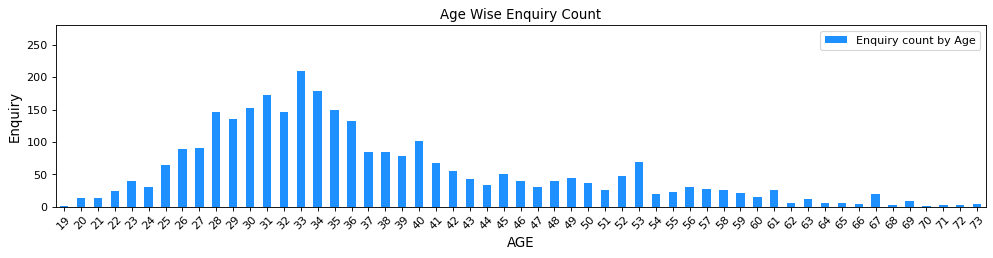

In [319]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_age[0:55].plot(kind='bar',x='AGE_INT',y='CTB Enquiry', color="dodgerblue",legend=False,ax=ax,)
#for p in splot.patches:
        #splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               #'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry", fontsize=12)
plt.xlabel("AGE", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=280, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry count by Age"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Age Wise Enquiry Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#14_18%.jpg", bbox_inches='tight')       
plt.show()


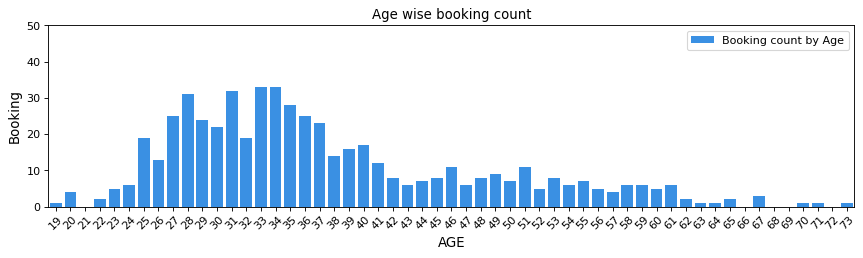

In [320]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df_age[0:55], x = 'AGE_INT', y = 'CTB Booking', ci = None, color="dodgerblue")
#for p in splot.patches:
        #splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               #'center', xytext = (0, 10), textcoords = 'offset points')
#df_age[0:55].plot(kind='bar',x='AGE_INT',y='CTB Booking', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking", fontsize=12)
plt.xlabel("AGE", fontsize = 12)
#plt.xticks(np.arange(0, len(df_age['AGE_INT'])+1, 5))
plt.xticks(rotation=45)
plt.ylim(ymax=50, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Booking count by Age"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Age wise booking count", fontsize=12)
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')      
plt.savefig("#15_18.7%.jpg", bbox_inches='tight')   

plt.show()

In [326]:
df_occ=pd.read_excel("occ_Trend_Mar.xlsx")

In [327]:
df_occ.head()

,Unnamed: 0,Occupation,Enquiry,Booking
0,0,Business,596.0,131.0
1,1,Farmer,28.0,12.0
2,2,Government,295.0,81.0
3,3,IT,182.0,51.0
4,4,Doctor,82.0,24.0


In [329]:
df_occ.sort_values("Enquiry", axis = 0, ascending = False, inplace = True, na_position ='last') 


In [333]:
df_occ.drop(df_occ.loc[df_occ['Occupation']=='Other'].index, inplace=True)

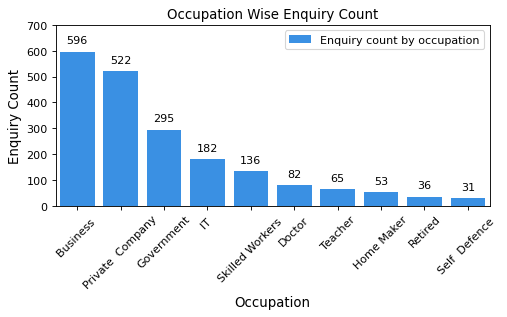

In [335]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df_occ[0:10], x = 'Occupation', y = 'Enquiry', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df_occ.plot(kind='bar',x='Occupation',y='CTB Enquiry', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Occupation", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=700, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry count by occupation"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Occupation Wise Enquiry Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#16.jpg", bbox_inches='tight')        
plt.show()

In [337]:
df_occ.sort_values("Booking", axis = 0, ascending = False, inplace = True, na_position ='last') 


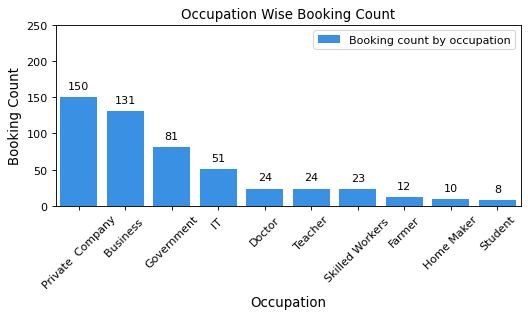

In [338]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7.5, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df_occ[0:10], x = 'Occupation', y = 'Booking', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df_occ.plot(kind='bar',x='Occupation',y='CTB Enquiry', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Occupation", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=250, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Booking count by occupation"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Occupation Wise Booking Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
       
plt.savefig("#17.png", bbox_inches='tight')
plt.show()